In [48]:
import torch
from torch.autograd import Variable

## DATASET

In [49]:
dataset = [] #list of tuples (image, label)

zer = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

one = torch.Tensor([[0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1],
                   ])

two = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                   ])

thr = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

fou = torch.Tensor([[0, 0, 1, 0, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

fiv = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

six = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

sev = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 1],
                   ])

eig = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

nin = torch.Tensor([[0, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1],
                    [0, 0, 1, 1, 1],
                    [0, 0, 0, 0, 1],
                    [0, 0, 1, 1, 1],
                   ])

dataset.append((zer, torch.Tensor([0])))
dataset.append((one, torch.Tensor([1])))
dataset.append((two, torch.Tensor([2])))
dataset.append((thr, torch.Tensor([3])))
dataset.append((fou, torch.Tensor([4])))
dataset.append((fiv, torch.Tensor([5])))
dataset.append((six, torch.Tensor([6])))
dataset.append((sev, torch.Tensor([7])))
dataset.append((eig, torch.Tensor([8])))
dataset.append((nin, torch.Tensor([9])))



### Take a look into how the data looks like

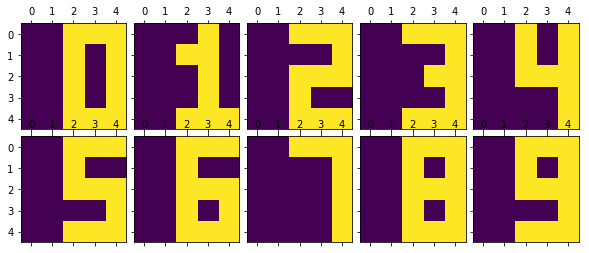

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

def showImage(path):
    image = Image.open(path)
    image.show()

fig = plt.figure(1,(10., 50.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (data, target) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(data.numpy()))
plt.show()

## MODEL

In [51]:
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = nn.Linear(5*5, 10, bias=False)

    def forward(self, x):
        x = self.output_layer(x)
        return F.log_softmax(x)
    

In [88]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=1, momentum=0.1)

### DATASET - MODEL - OUTPUT

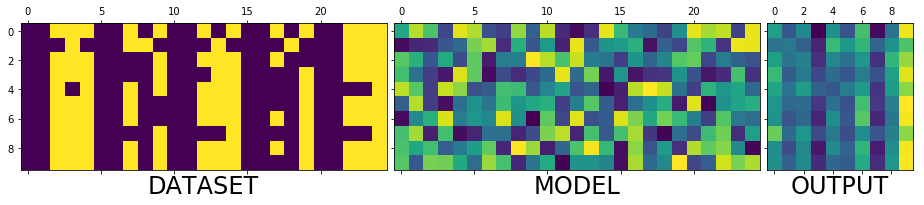

In [89]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.1)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target).squeeze()
grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_xlabel('DATASET', fontsize=24)

grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_xlabel('MODEL', fontsize=24)

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_xlabel('OUTPUT', fontsize=24)


plt.show()

Lets try to understand what is in the picture above. 

The first one is the collection of all the data that we have. 
The second one is the matrix of weights connecting the input of 25 input neurons to 10 output neurons.
And the last one we will get to it little later.

###### What is special about 25 and 10 here? 
Nothing. Our dataset is a set of images of numbers each having a size of 5x5 ==> 25. And we have how many different numbers a hand? 0,1,2...9 ==> 10 numbers or 10 different classes of output(this will become clear in the next post)

I can hear you screaming,

"no no  no, get back to the dataset? What is that weird picture on the left, having weird 
zero in the top-left,
and three on the bottom-right
and some messed up fours and eights in the middle."

Let get to it. Look the picture below.

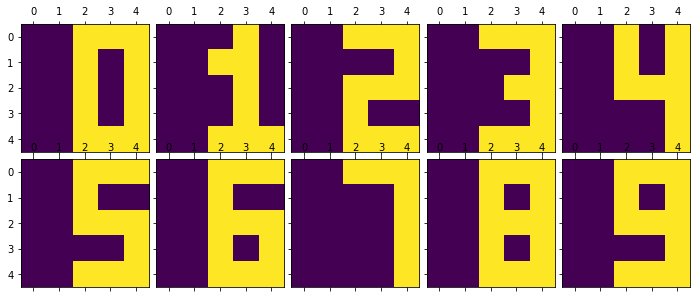

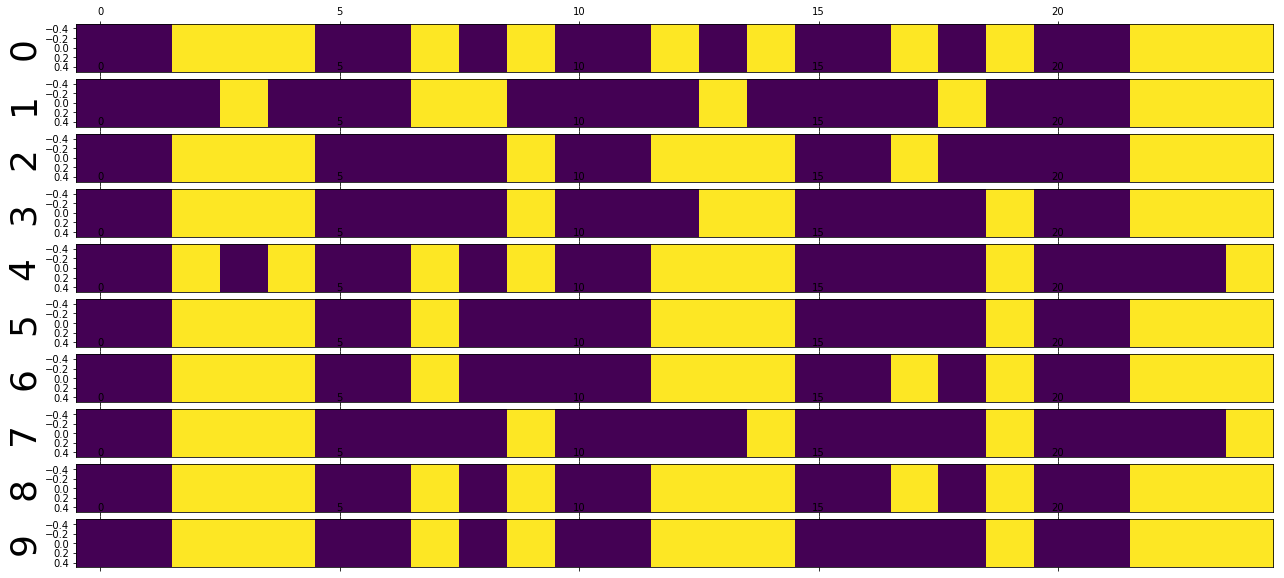

In [62]:
fig = plt.figure(1,(12., 12.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2 , 5),
                 axes_pad=0.1)

for i, (d, t) in enumerate(dataset):
    grid[i].matshow(Image.fromarray(d.numpy()))
    
plt.show()

fig = plt.figure(1, (100., 10.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(dataset), 1),
                     axes_pad=0.1)


data = [data.view(1, -1) for data, target in dataset]

for i, d in enumerate(data):
    grid[i].matshow(Image.fromarray(d.numpy()))
    grid[i].set_ylabel('{}'.format(i), fontsize=36)


Voila!! We have just arranged the image matrix into a vector. The reason is it reduces the computational complexity to a little and makes it easier to operate over mutiple samples of data at the same time. We saw that the model - matrix which connects the 25 input neurons to 10 output neurons. So we cannot keep the input images as matrices , if we do, then the result of matrix multiplication is not same as the output of the neural network which looks at all the pixels of the image and say how similar the input image is to the classes of numbers. 

This is important to remember, **a simple neural network looks at the input and try to figure out which class does this input belong to** 

in our case inputs are the images of numbers, and outputs are how similar are the classes to the input. Th output neuron with highest value is more closer to the input and the output neuron with least value is very NOT similar to the input.

For example after training, if we feed the image of number 3, the output neurons corresponding to 3, 8, 9 and probably 7 will have larger values and the output neurons corresponding to 1 and 6 will have the least value. Don't worry if you don't understand why, it will become clearer as we go on.  

#### How many correct predictions without any training

Too much theory, lets get our hands dirty. Let see how many numbers did our model predicted correctly.

In [78]:
# Remember that output = model(Variable(data))
pred = output.data.max(1)[1].squeeze()    
print(pred.size(), target.size())
correct = pred.eq(target.long()).sum()
print('correct: {}/{}'.format(correct, len(dataset)))

torch.Size([10]) torch.Size([10, 1])
correct: 0/10


#### NONE out of TEN
That is right it predicted none out of ten. We feeded our network with all of our data and asked it to figure what is the number that is in the image. Remember what we learned earlier about output neurons. The neural network tell us which number is present in the image by lighting up that corresponding neuron. Lets say if gave 6, the network will light up the 6th neuron will be the brightest, i.e the 6th neurons value will be the highest compared to all other neurons. 

But our network above lit up wrong bulbs, for all the output. None out of ten. But why? Isn't neural network are supposed to smarter? Well yes and no. That is the difference between traditional image processing algorithms and neural networks. 

Wait, let me tell you a story, that I heard. During the second world war, there were skilled flight spotter. Their job was to spot and report if any air craft was approaching. As the war got intense, there was need for more spotters and there were lot of volunteers even from schools and colleges but there was very little time to train them. So the skilled spotters, listed out a set of things to look for in the enemy flights and asked the new volunteers to memorize them as part of the training. But the volunteers never got good at spotting. Ooosh, we will continue the story later, lets get back to the point. 

In classical image processing systems, we humans think, think and think and think a lot more and come up a set of rules or instructions, just like those skilled spotters. We give those instructions to the system, to make it understand how to process the images to extract information(called features - things to look for in the enemy flight) from them, and then use that information to make further decisions, such predicting what number is in the image. We feed that system with knowledge first before asking it to do anything for us. 

But did we feed any knowledge to network? We just told it the input size is 25 and output size is 10. How can you expect someone to guess what is in your hand, by just telling them its size. That is rude of you. Shame on you. Okay okay. How do we make the system more knowledgable about the input? Training. The holy grail of deep learning. 

### What is training?
We know that the knowledge of the neural network is in the weights of the connections - represented as matrix above. We also know that by multiplying this matrix by an input image vector we will get an output which is a set of scores that describes, how similar the input is to the output neurons.  

Imagine giving random values to the weights and feed the network with our data and see whether it predicts all our numbers correctly. If it did, fine and dandy, but if not give random values to the weights again and repeat the process until our network predicts all the numbers correctly. That is training in most simple form. 

But think about how long will it take to find such random magical values for every weight in the network to make it work as expected. We don't know that for sure. right? You wanna continue the story. don't you? Alright. 

The skilled people tried as much as they can to identify the distinguishing features of the home and enemy air crafts and tried to make the volunteers understand them. It never worked. Then they changes the strategy. They put them on the job and made them learn themselves. i.e every skilled spotter will have ten volunteers and whenever an aircraft is seen, the volunteers will shout the kind of the plane, say 'german'. Then the skilled one, will reveal the correct answer. This technique was extrememly sucessful, a spotter sent in an emergency message not only identifying it as a German aircraft, but also the correct make and model..[more](http://www.colebrookhistoricalsociety.org/PDF%20Images/Air%20Spotters%20of%20WWII.pdf) 

Hey, why don't we try the same with our network? Lets feed the images into it and shout the answer into its tiny little output neurons so that it can update its weights by itself. Now I know you're asking how can we expect, a dumb network which cannot even predict a number in an image to train itself? Well that is where it gets interesting. I must now ask you to read backpropogation algorithm to understand how the training works. Take your time, this is at the heart of deep learning and neural networks. I suggest Michael Nielson's [book](http://neuralnetworksanddeeplearning.com/chap2.html)

So now you understand why it predicted none out of ten correctly.

### lets combine the above two blocks and make a function out of it

In [64]:
def test_and_print(model, dataset, plot=True):
      
    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data).squeeze()

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target).squeeze()
    output = model(Variable(data))
        
    loss = F.nll_loss(output, Variable(target.long()))
    
    dataset_img = Image.fromarray(data.numpy())
    model_img   = Image.fromarray(model.output_layer.weight.data.numpy())
    output_img  = Image.fromarray(output.data.numpy())
    
    pred = output.data.max(1)[1] 
    correct = pred.eq(target.long()).sum()
    
    if plot:
        fig = plt.figure(1,(16., 16.))
        grid = ImageGrid(fig, 111,
                         nrows_ncols=(1 , 3),
                         axes_pad=0.1)

        grid[0].matshow(dataset_img)
        grid[0].set_xlabel('DATASET', fontsize=24)

        grid[1].matshow(model_img)
        grid[1].set_xlabel('MODEL', fontsize=24)
        
        grid[2].matshow(output_img)
        grid[2].set_xlabel('OUTPUT', fontsize=24)
        
        plt.show()    
        
    print('correct: {}/{}, loss:{}'.format(correct, len(dataset), loss.data[0]))
        
    return dataset_img, model_img, output_img 

### Lets take a closer look at DATASET - MODEL - OUTPUT 
*with help from, https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib*

and understand what those colors mean.

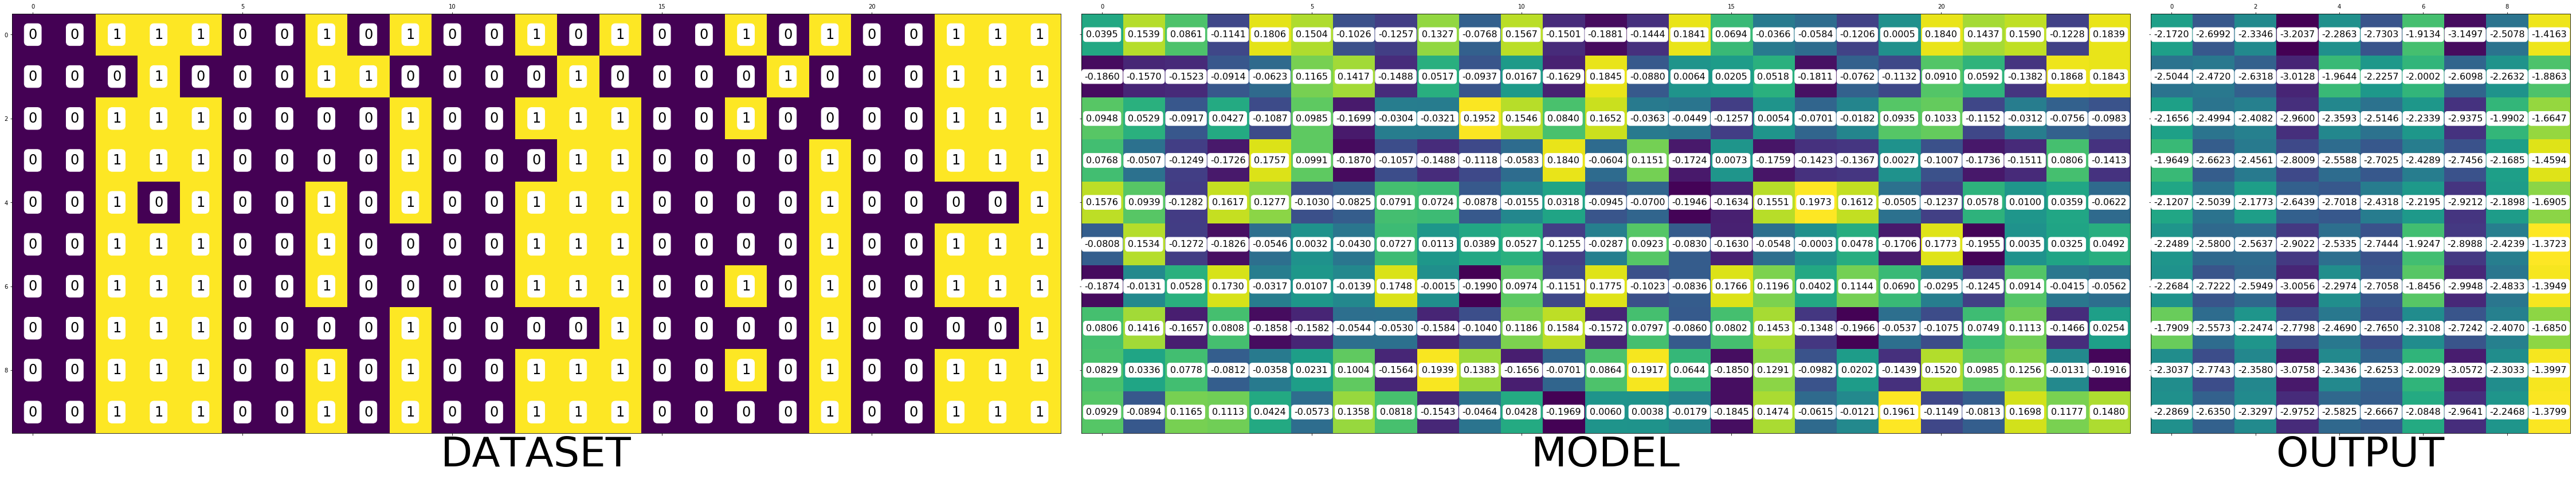

In [90]:
import numpy
fig = plt.figure(1, (80., 80.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 3),
                     axes_pad=0.5)


data = [data.view(-1) for data, target in dataset]
data = torch.stack(data)

target = [target.view(-1) for data, target in dataset]
target = torch.stack(target)

grid[0].matshow(Image.fromarray(data.numpy()))
grid[0].set_xlabel('DATASET', fontsize=72)
for (x,y), val in numpy.ndenumerate(data.numpy()):
     grid[0].text(y, x, '{:d}'.format(int(val)), ha='center', va='center', fontsize=24,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

        
grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
grid[1].set_xlabel('MODEL', fontsize=72)
for (x,y), val in numpy.ndenumerate(model.output_layer.weight.data.numpy()):
     grid[1].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

output = model(Variable(data))
grid[2].matshow(Image.fromarray(output.data.numpy()))
grid[2].set_xlabel('OUTPUT', fontsize=72)
for (x,y), val in numpy.ndenumerate(output.data.numpy()):
     grid[2].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


plt.show()

If you zoom in the picture you will see numbers corresponding to the colors - violet means the lowest value, and yellow is the highest values. i.e violet does not mean 0 and yellow does not mean 1 as you might think from the dataset image. Take look at the following. It shows a single row from the output image. Go on pick the darkest square in the output above. First row itself has the darkeset one right, corresponding to number 0, i.e *data[0]*  the least value from that row is  **-3.2037**

In [93]:
print(model(Variable(data[0].view(1, -1))))

Variable containing:
-2.1720 -2.6992 -2.3346 -3.2037 -2.2863 -2.7303 -1.9134 -3.1497 -2.5078 -1.4163
[torch.FloatTensor of size 1x10]



Similarly the brightest yellow is in the second last row, corresonding to number 8 whose value is **-1.3997** you can see below. The reason I am stressing about this fact is, this is will influence how we interpret the following images. 


In [98]:
print(model(Variable(data[8].view(1, -1))))

Variable containing:
-2.3037 -2.7743 -2.3580 -3.0758 -2.3436 -2.6253 -2.0029 -3.0572 -2.3033 -1.3997
[torch.FloatTensor of size 1x10]



In [67]:
import numpy
def plot_with_values(model, dataset):
    fig = plt.figure(1, (80., 80.))
    grid = ImageGrid(fig, 111,
                         nrows_ncols=(1, 3),
                         axes_pad=0.5)


    data = [data.view(-1) for data, target in dataset]
    data = torch.stack(data)

    target = [target.view(-1) for data, target in dataset]
    target = torch.stack(target)

    grid[0].matshow(Image.fromarray(data.numpy()))
    grid[0].set_xlabel('DATASET', fontsize=144)
    for (x,y), val in numpy.ndenumerate(data.numpy()):
         grid[0].text(y, x, '{:d}'.format(int(val)), ha='center', va='center', fontsize=24,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


    grid[1].matshow(Image.fromarray(model.output_layer.weight.data.numpy()))
    grid[1].set_xlabel('MODEL', fontsize=144)
    for (x,y), val in numpy.ndenumerate(model.output_layer.weight.data.numpy()):
         grid[1].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))

    output = model(Variable(data))
    grid[2].matshow(Image.fromarray(output.data.numpy()))
    grid[2].set_xlabel('OUTPUT', fontsize=144)
    for (x,y), val in numpy.ndenumerate(output.data.numpy()):
         grid[2].text(y, x, '{:0.04f}'.format(val), ha='center', va='center',fontsize=16,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='white'))


    plt.show()

### What does each row mean?

##### DATASET
numbers, each row is a number. first one is 0 second one is 1 and so on.
##### MODEL
weights corresponding to pixels in the image for a number. first row is for 0 and last one is for 9.
##### OUTPUT
scores of similarity. relative resemblance of the input number to all output numbers. First row contains scores of 0, how similar it is to all other numbers first square in the first row is how simlilar 0 is to 0, second square similar it is to 1. Now the scores are not only incorrect but stupid. This will become better and clear as we train the network. Lets take look at the DATASET-MODEL-OUTPUT trinity once again before training


### Before Training


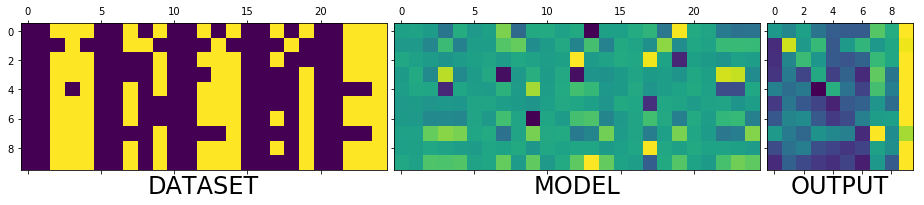

correct: 2/10, loss:5.612292289733887


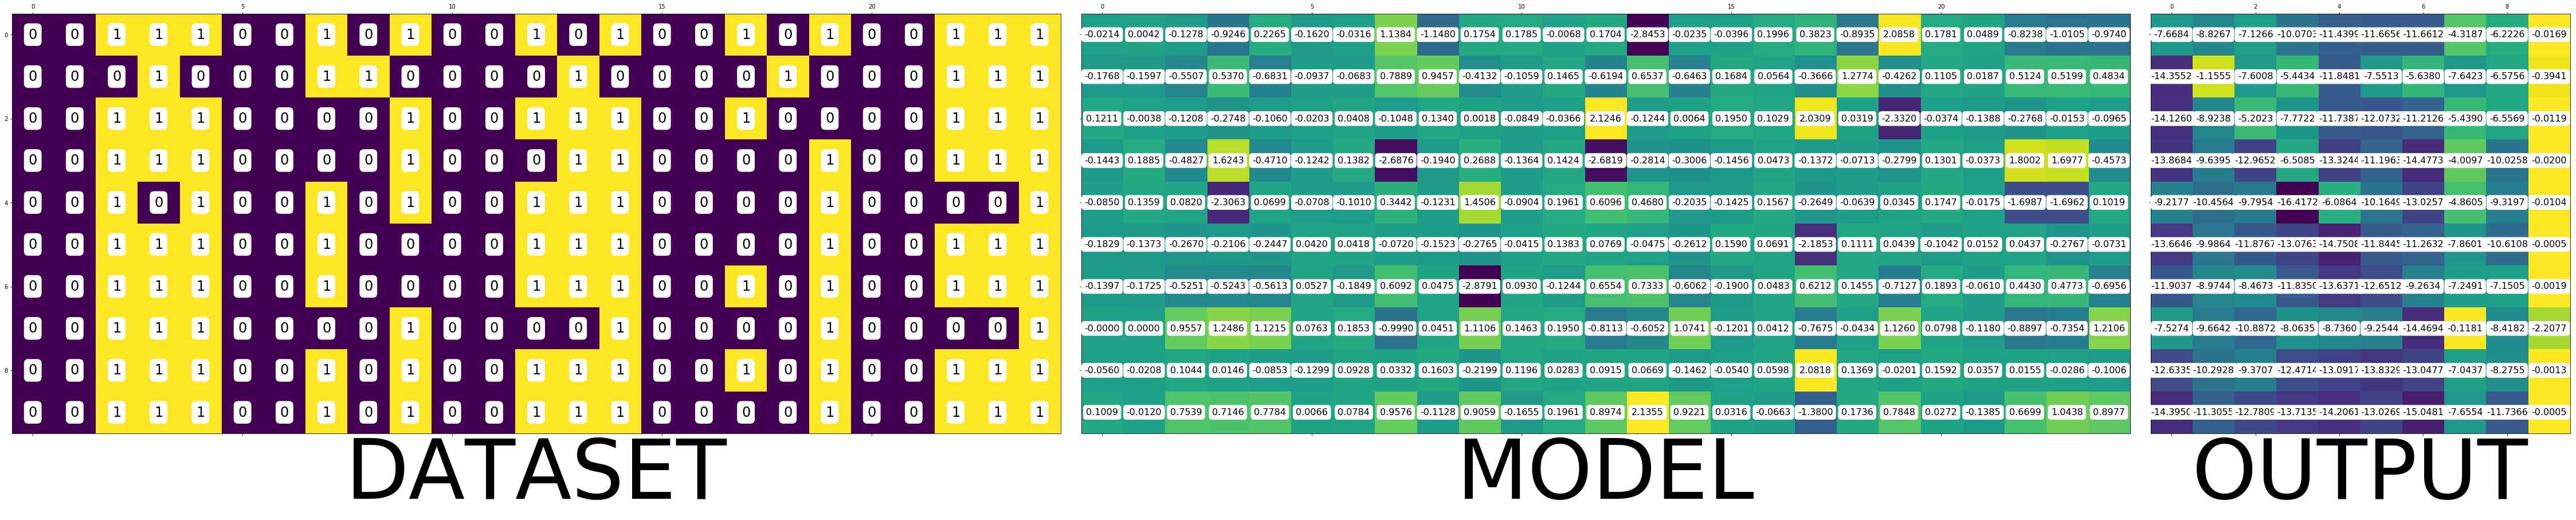

In [85]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

## Training

#### Train for a single epoch

Training for a single epoch means run over all the ten images we have now.

In [54]:
def train(model, optim, dataset):
    model.train()
    avg_loss = 0
    for i, (data, target) in enumerate(dataset):
        data = data.view(1, -1)
        data, target = Variable(data), Variable(target.long())
        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        avg_loss += loss.data[0]
        
    return avg_loss/len(dataset)

#### Train the model once and see how it works

In [86]:
train(model, optimizer, dataset)

5.025314002856613

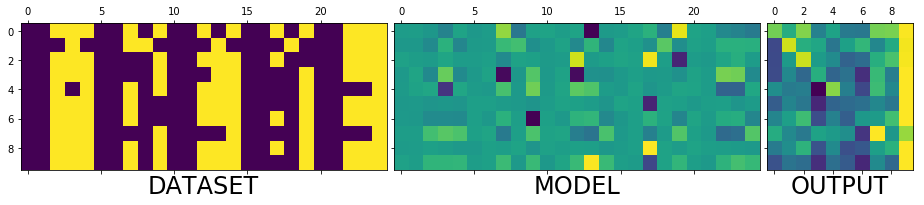

correct: 2/10, loss:4.517192363739014


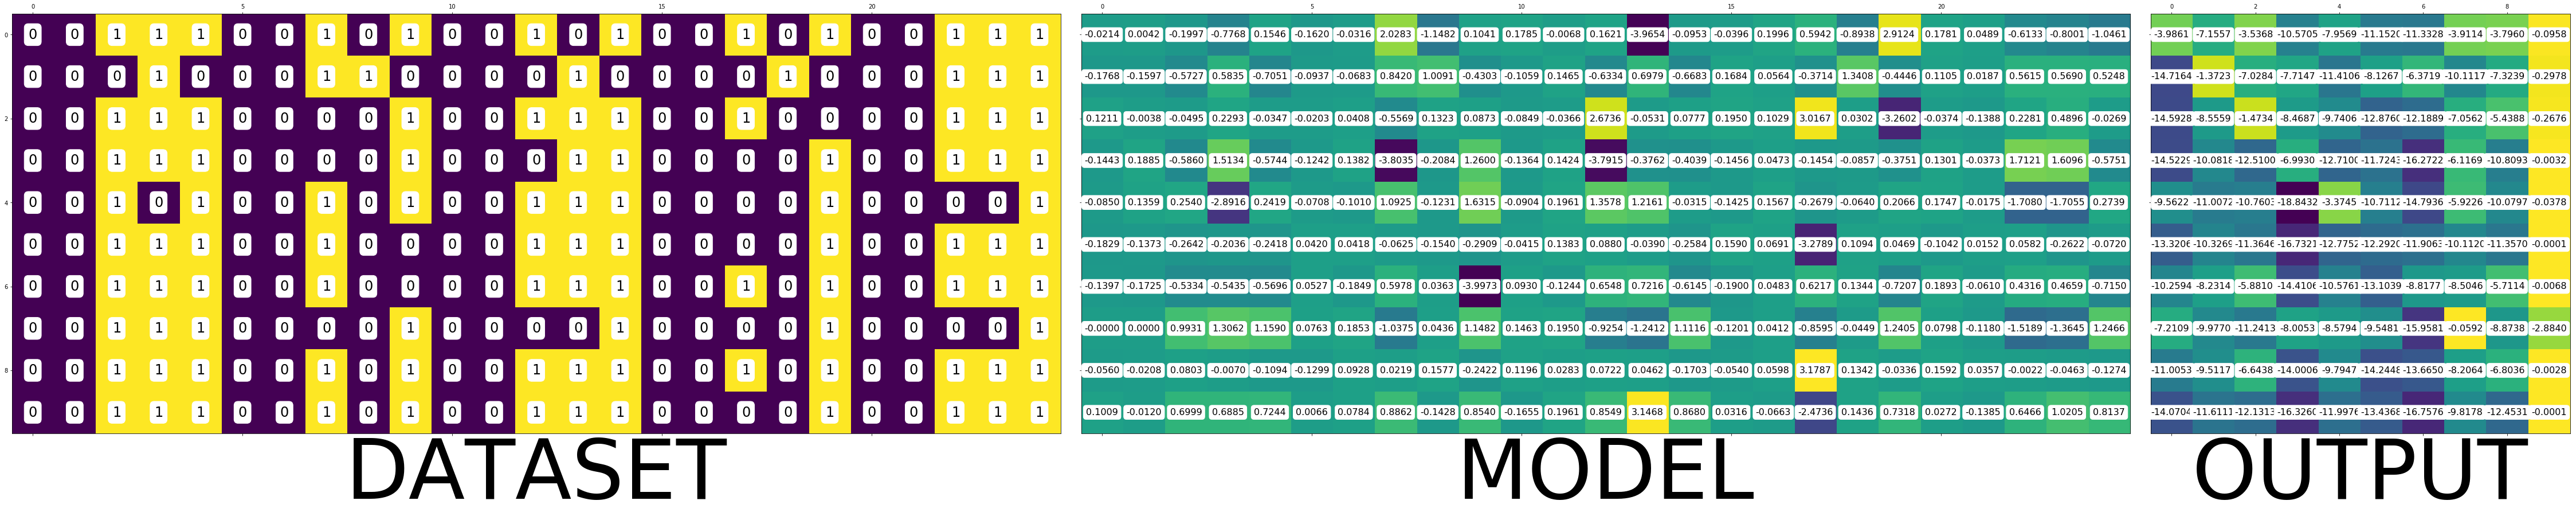

In [87]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

#### train once again

In [71]:
train(model, optimizer, dataset)

6.229383989237249

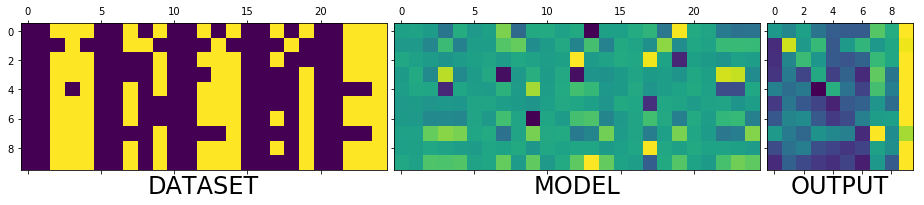

correct: 2/10, loss:5.612292289733887


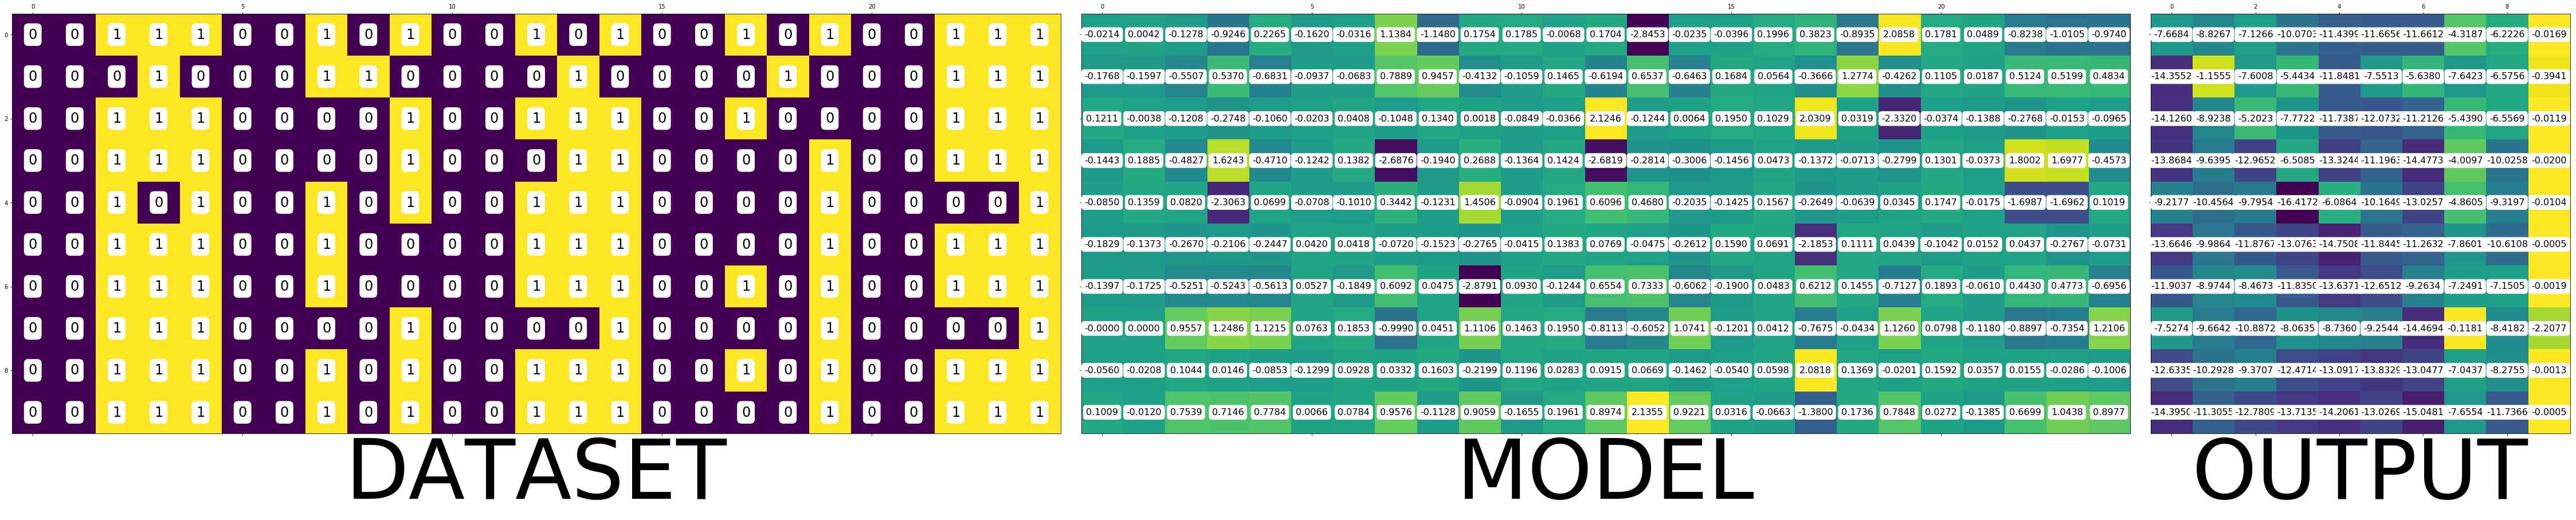

In [72]:
test_and_print(model, dataset)
plot_with_values(model, dataset)

As you can see the diagonal of the output matrix is getting brighter and brighter. 

That is what we want right?  For each number, say for number
0. the first square in first row should be the brightest one.
1. the second square in second row should be the brightest one
2. the third square in third row should be the brightest one and so on.

Lets see the numbers directly.

In [73]:
print(data)
print(model.output_layer.weight.data)
print(output.data)



Columns 0 to 12 
    0     0     1     1     1     0     0     1     0     1     0     0     1
    0     0     0     1     0     0     0     1     1     0     0     0     0
    0     0     1     1     1     0     0     0     0     1     0     0     1
    0     0     1     1     1     0     0     0     0     1     0     0     0
    0     0     1     0     1     0     0     1     0     1     0     0     1
    0     0     1     1     1     0     0     1     0     0     0     0     1
    0     0     1     1     1     0     0     1     0     0     0     0     1
    0     0     1     1     1     0     0     0     0     1     0     0     0
    0     0     1     1     1     0     0     1     0     1     0     0     1
    0     0     1     1     1     0     0     1     0     1     0     0     1

Columns 13 to 24 
    0     1     0     0     1     0     1     0     0     1     1     1
    1     0     0     0     0     1     0     0     0     1     1     1
    1     1     0     0     1     0   

### Train over multiple epochs
means run over the all the samples multiple times.

In [106]:
def train_epochs(epochs, model, optim, dataset, print_every=10):
    snaps = []
    for epoch in range(epochs+1):
        avg_loss = train(model, optim, dataset)
        if not epoch % print_every:
            print('epoch: {}, loss:{}'.format(epoch, avg_loss/len(dataset)/10))
            snaps.append(test_and_print(model, dataset))
            

            return snaps

In [107]:
model = Model()
optimizer = optim.SGD(model.parameters(), lr=1, momentum=0.1)

Lets train for 100 epochs and see how the model evolves

epoch: 0, loss:0.07521587562561036


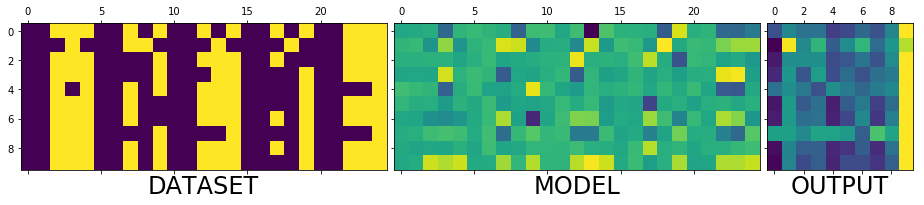

correct: 2/10, loss:6.490344047546387


In [108]:
snaps = train_epochs(100, model, optimizer, dataset)

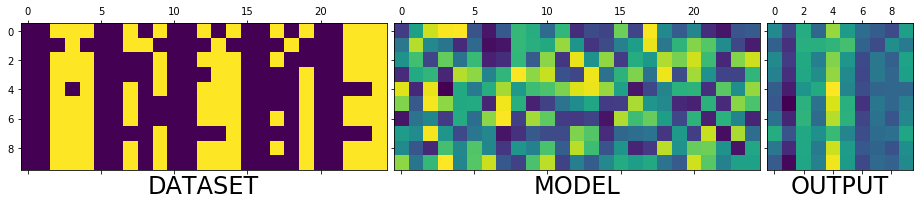

In [23]:
fig = plt.figure(1, (16., 16.))
grid = ImageGrid(fig, 111,
                     nrows_ncols=(len(snaps) , 3),
                     axes_pad=0.1)

for i, snap in enumerate(snaps):
    for j, image in enumerate(snap):
        grid[i * 3 + j].matshow(image)
        
grid[i * 3 + 0].set_xlabel('DATASET', fontsize=24)
grid[i * 3 + 1].set_xlabel('MODEL', fontsize=24)
grid[i * 3 + 2].set_xlabel('OUTPUT', fontsize=24)
        
plt.show()

epoch: 0, loss:1.4979378305724824e-05


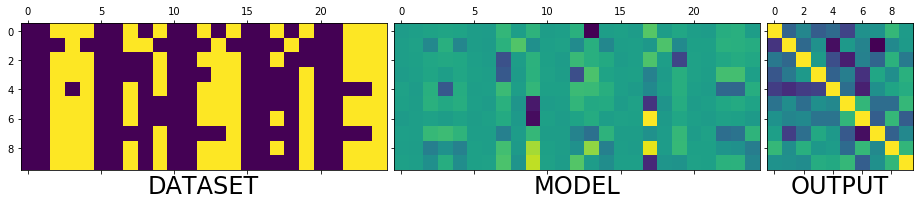

correct: 10/10, loss:0.0014949440956115723
epoch: 1000, loss:1.3566501729656011e-05


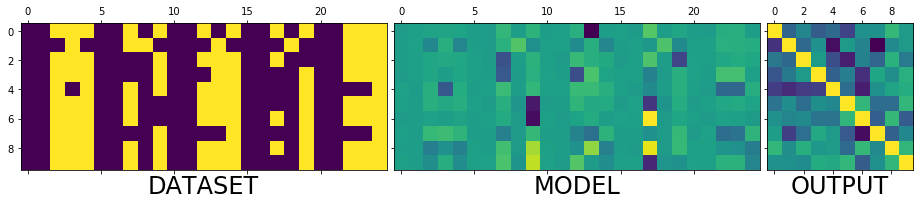

correct: 10/10, loss:0.0013541923835873604
epoch: 2000, loss:1.2397395898005925e-05


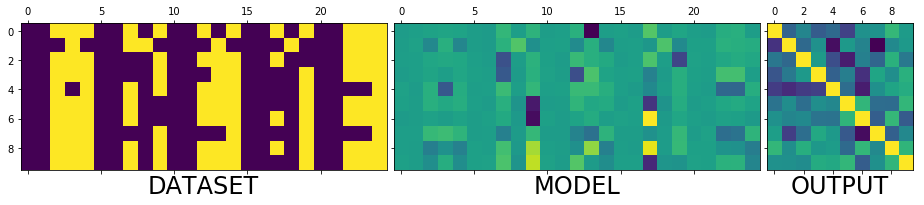

correct: 10/10, loss:0.0012376849772408605
epoch: 3000, loss:1.141426396497991e-05


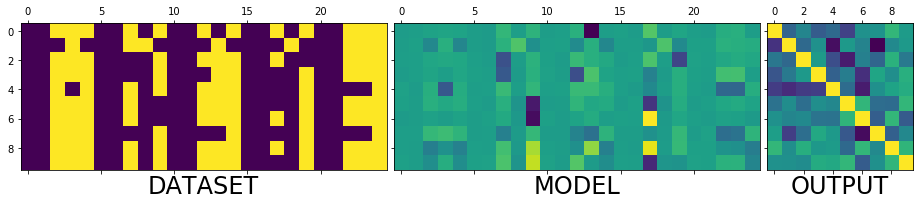

correct: 10/10, loss:0.0011396838817745447
epoch: 4000, loss:1.0574486601399258e-05


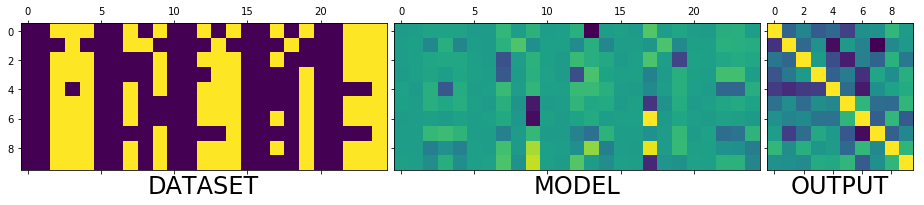

correct: 10/10, loss:0.0010559528600424528
epoch: 5000, loss:9.851084818365054e-06


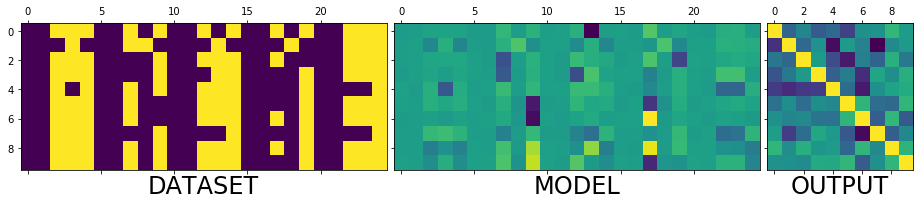

correct: 10/10, loss:0.0009838090045377612
epoch: 6000, loss:9.220464067766443e-06


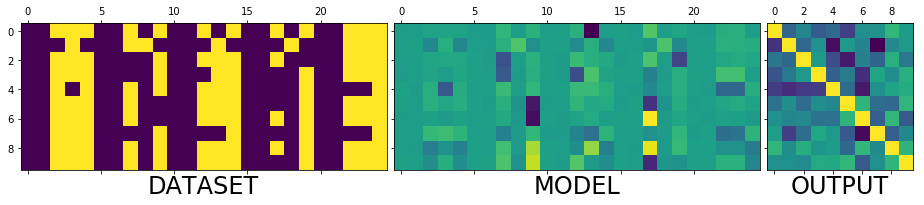

correct: 10/10, loss:0.000920907303225249
epoch: 7000, loss:8.666477806400509e-06


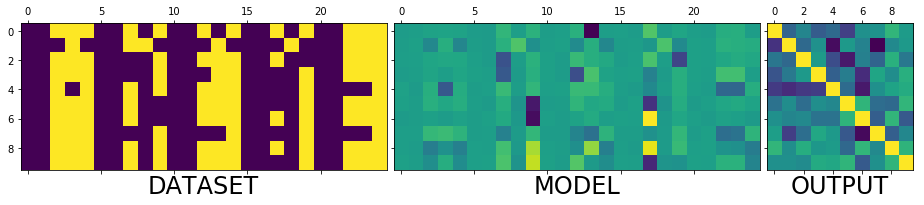

correct: 10/10, loss:0.0008656416903249919
epoch: 8000, loss:8.17526801256463e-06


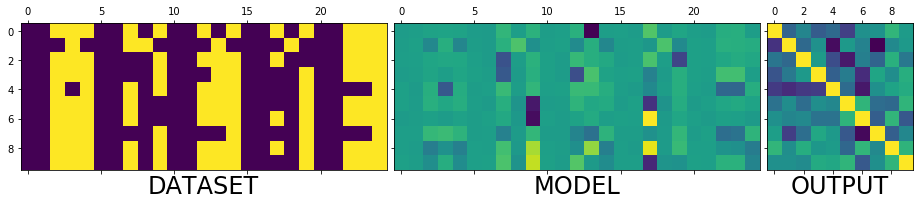

correct: 10/10, loss:0.000816631130874157
epoch: 9000, loss:7.73639925319003e-06


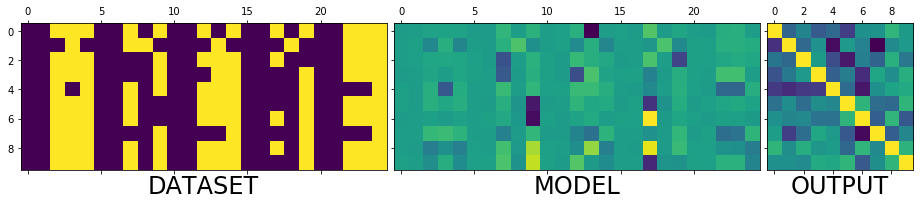

correct: 10/10, loss:0.0007728362688794732
epoch: 10000, loss:7.342388962570113e-06


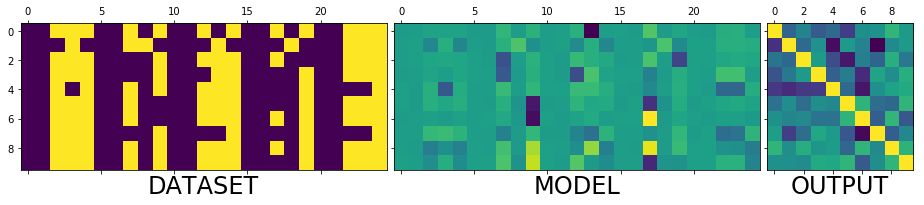

correct: 10/10, loss:0.000733515596948564
epoch: 11000, loss:6.987177541304847e-06


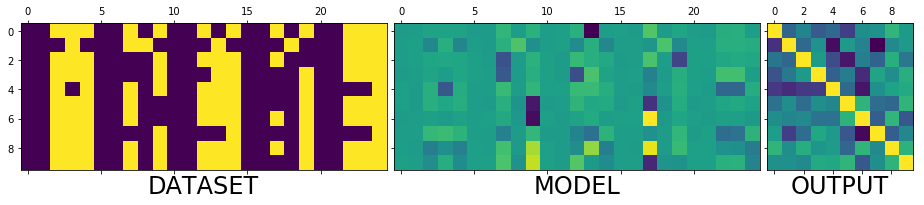

correct: 10/10, loss:0.0006980619509704411
epoch: 12000, loss:6.66436344909016e-06


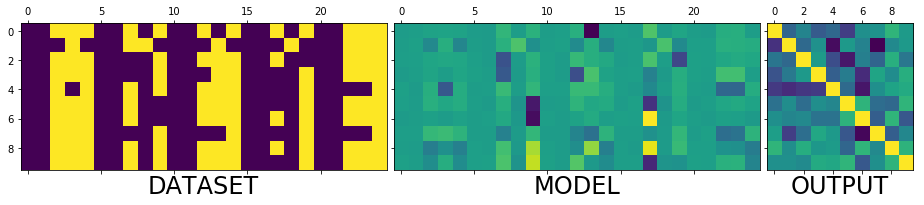

correct: 10/10, loss:0.0006658405181951821
epoch: 13000, loss:6.370135299221147e-06


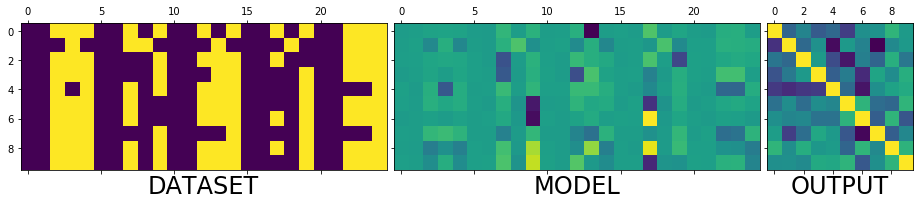

correct: 10/10, loss:0.0006364684668369591
epoch: 14000, loss:6.1013935264782045e-06


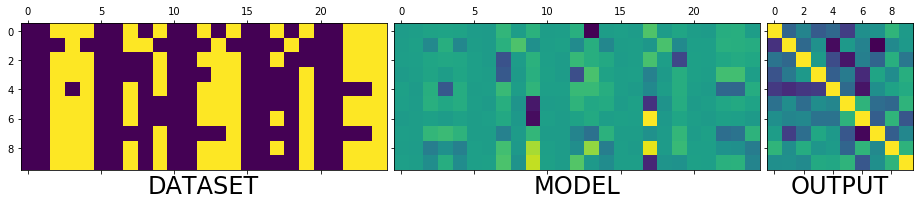

correct: 10/10, loss:0.0006096391589380801
epoch: 15000, loss:5.854485207237304e-06


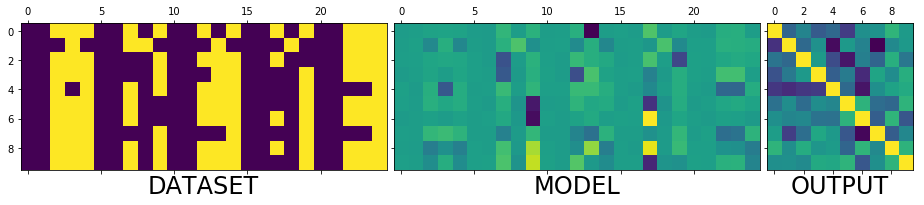

correct: 10/10, loss:0.0005849882145412266
epoch: 16000, loss:5.626929625577759e-06


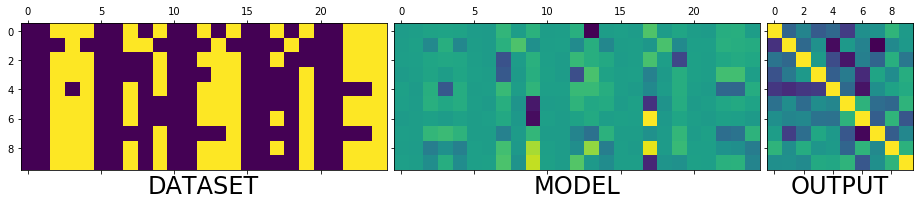

correct: 10/10, loss:0.0005622674943879247
epoch: 17000, loss:5.416594656708185e-06


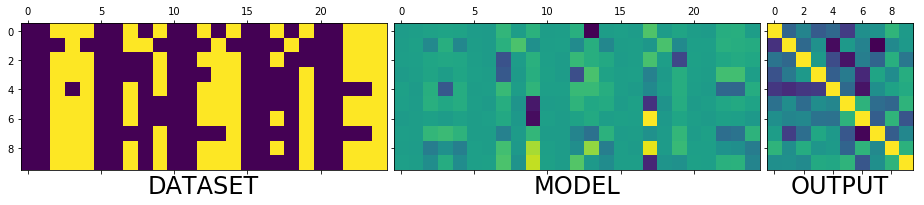

correct: 10/10, loss:0.0005412654136307538
epoch: 18000, loss:5.2213049784768376e-06


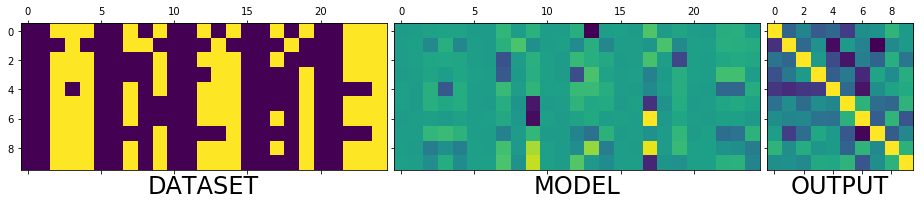

correct: 10/10, loss:0.0005217638099566102
epoch: 19000, loss:5.039620846218896e-06


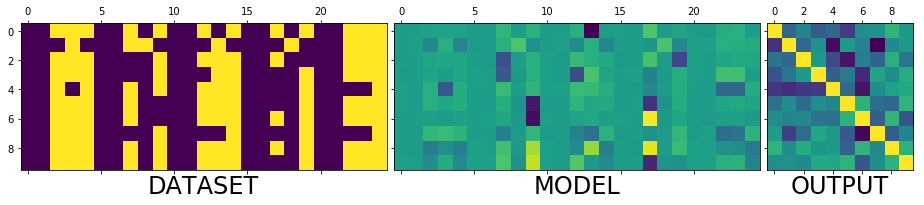

correct: 10/10, loss:0.0005036209477111697
epoch: 20000, loss:4.869873519055546e-06


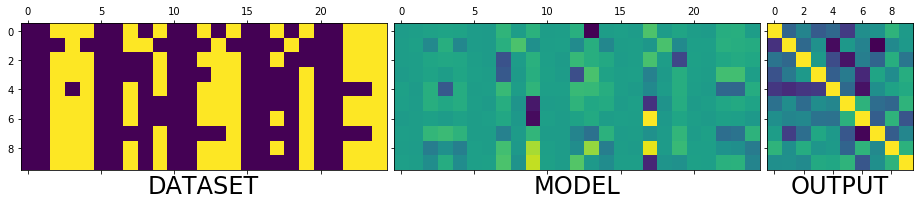

correct: 10/10, loss:0.0004866681119892746
epoch: 21000, loss:4.7111265157582235e-06


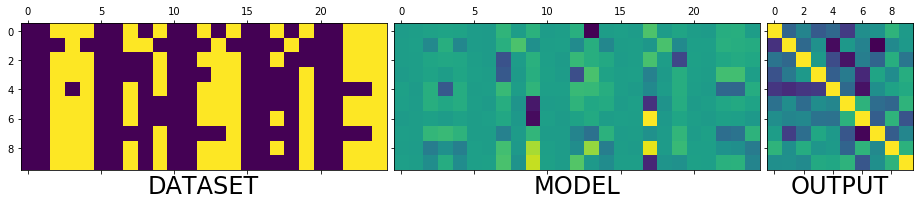

correct: 10/10, loss:0.00047081400407478213
epoch: 22000, loss:4.562667345453519e-06


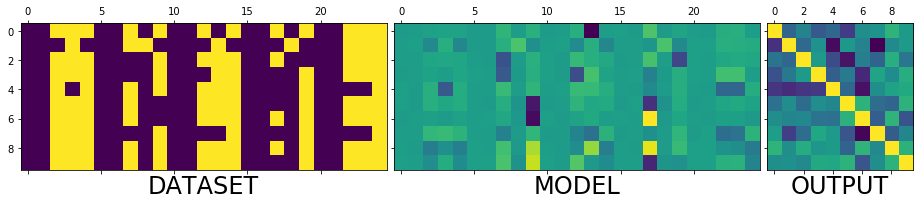

correct: 10/10, loss:0.00045598665019497275
epoch: 23000, loss:4.423383987159469e-06


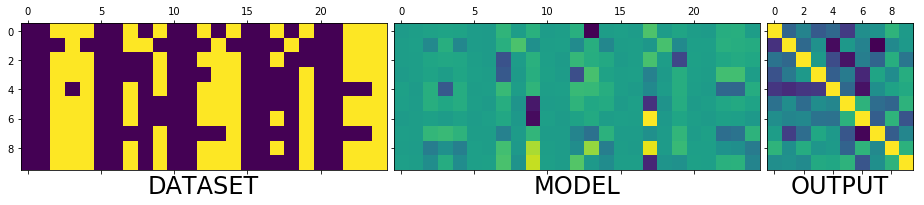

correct: 10/10, loss:0.0004420751647558063
epoch: 24000, loss:4.292191806598566e-06


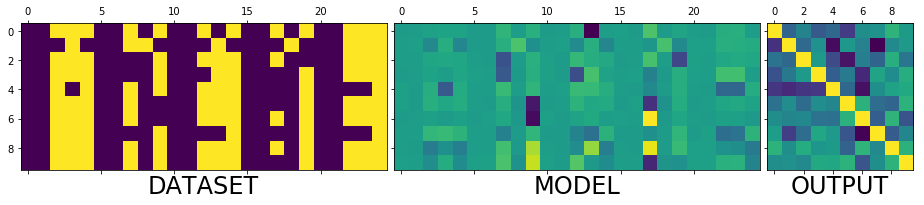

correct: 10/10, loss:0.0004289712815079838
epoch: 25000, loss:4.168330851825886e-06


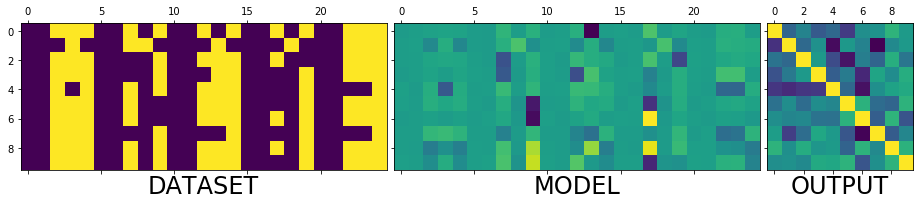

correct: 10/10, loss:0.00041659921407699585
epoch: 26000, loss:4.051415649882984e-06


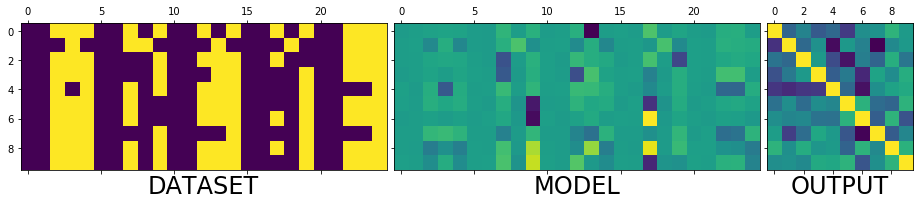

correct: 10/10, loss:0.00040492042899131775
epoch: 27000, loss:3.9410730714735106e-06


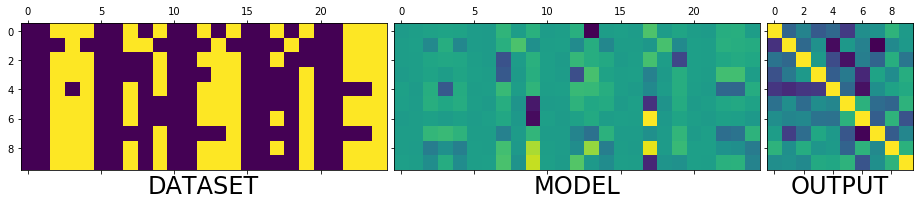

correct: 10/10, loss:0.00039389816811308265
epoch: 28000, loss:3.836599891656078e-06


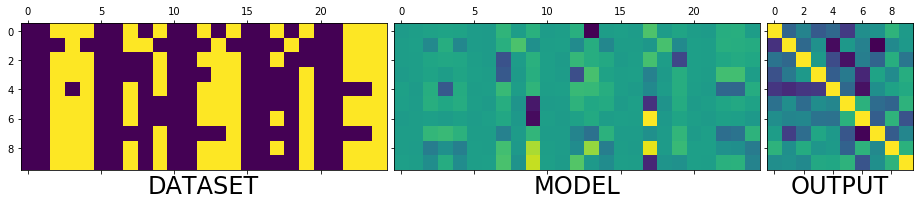

correct: 10/10, loss:0.00038346173823811114
epoch: 29000, loss:3.7375376195996066e-06


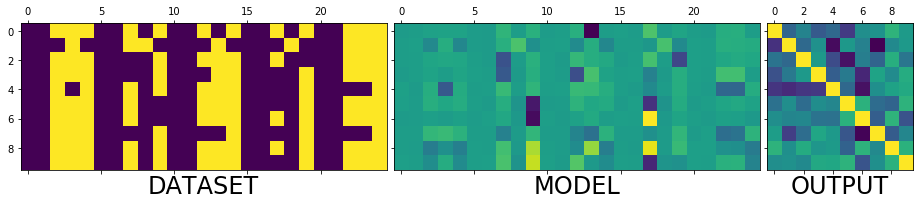

correct: 10/10, loss:0.0003735655336640775
epoch: 30000, loss:3.643752643256448e-06


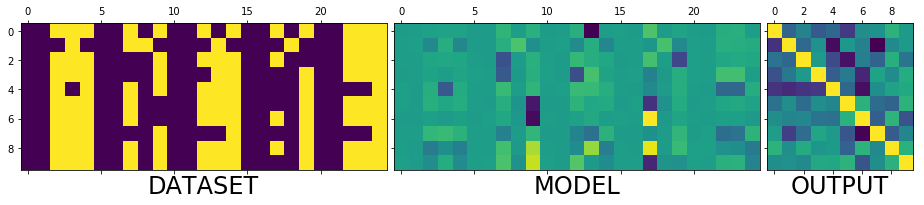

correct: 10/10, loss:0.00036419619573280215
epoch: 31000, loss:3.554246144631179e-06


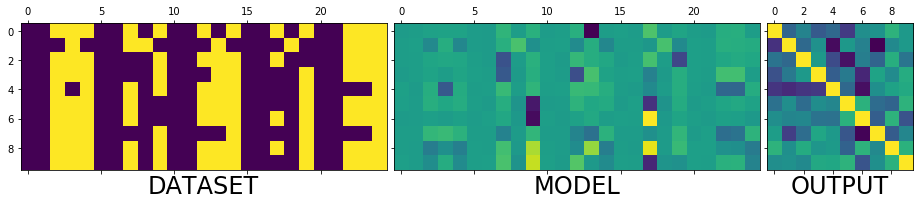

correct: 10/10, loss:0.00035525442217476666
epoch: 32000, loss:3.4688986270339234e-06


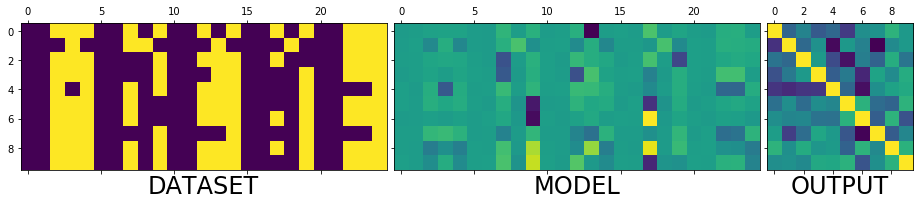

correct: 10/10, loss:0.0003467276110313833
epoch: 33000, loss:3.38783597908332e-06


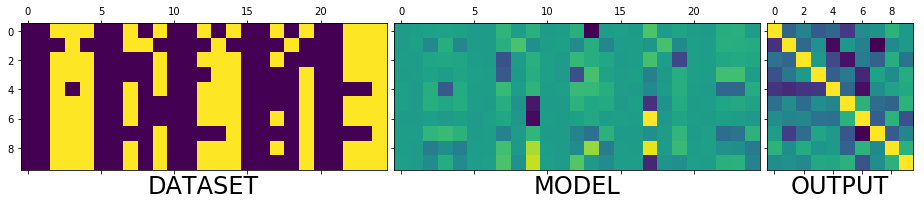

correct: 10/10, loss:0.0003386292955838144
epoch: 34000, loss:3.3104618269135243e-06


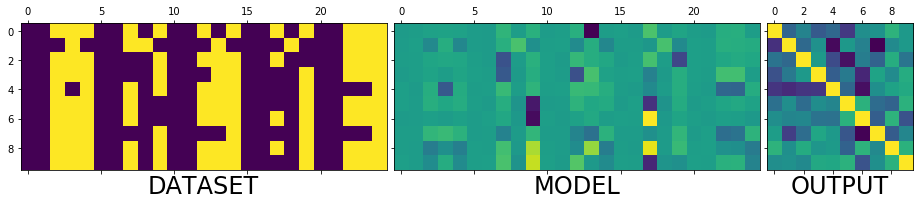

correct: 10/10, loss:0.00033089861972257495
epoch: 35000, loss:3.236417862353846e-06


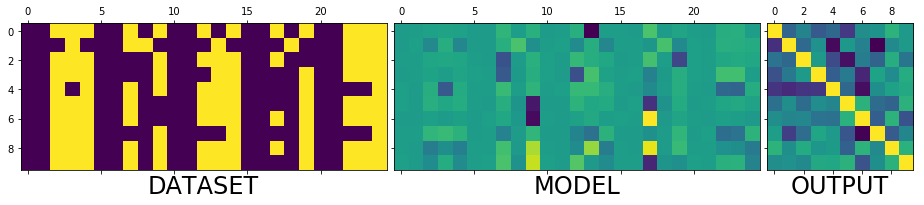

correct: 10/10, loss:0.0003235008043702692
epoch: 36000, loss:3.1655030616093424e-06


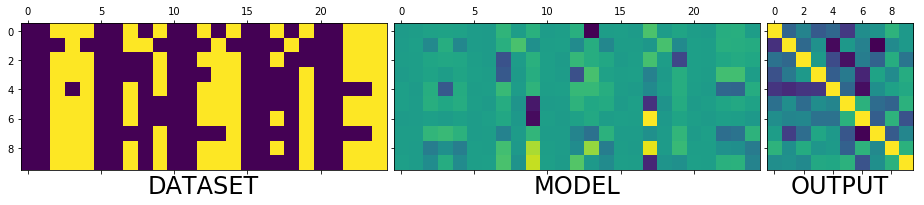

correct: 10/10, loss:0.00031641527311876416
epoch: 37000, loss:3.097559627349256e-06


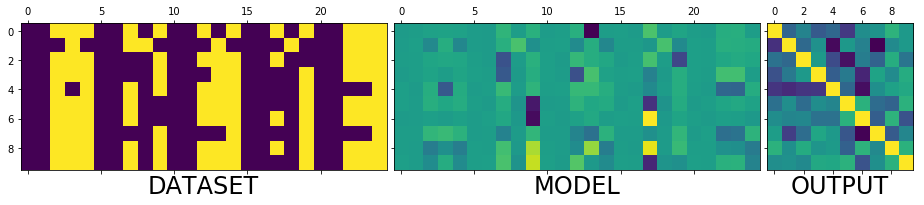

correct: 10/10, loss:0.0003096264263149351
epoch: 38000, loss:3.0326169580803253e-06


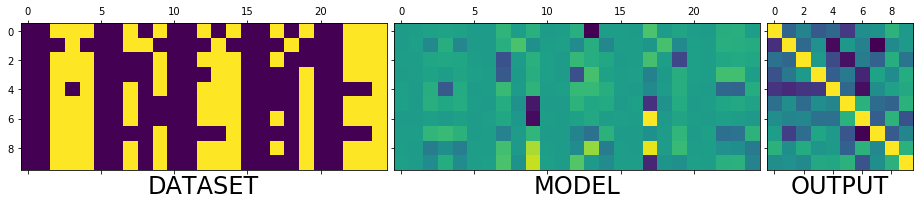

correct: 10/10, loss:0.00030313775641843677
epoch: 39000, loss:2.9704941298405175e-06


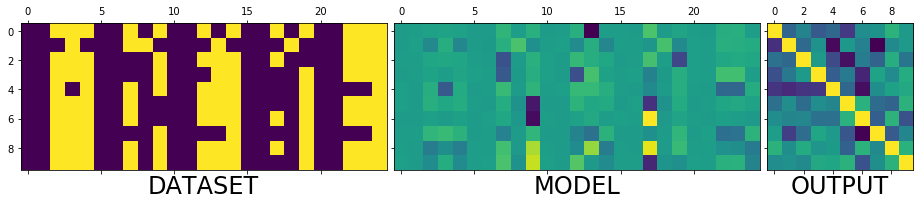

correct: 10/10, loss:0.00029693052056245506
epoch: 40000, loss:2.9106522124493495e-06


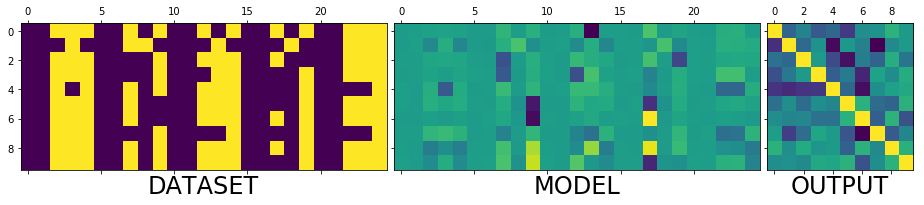

correct: 10/10, loss:0.0002909509348683059
epoch: 41000, loss:2.8533561817312146e-06


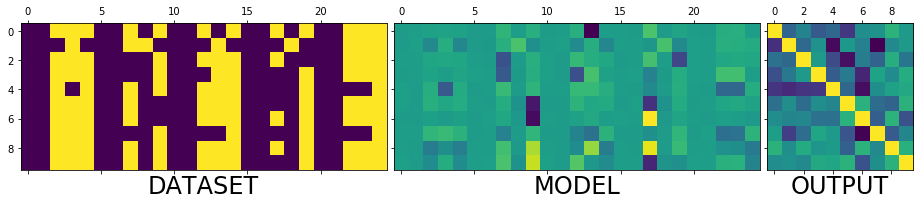

correct: 10/10, loss:0.0002852260076906532
epoch: 42000, loss:2.797896486299578e-06


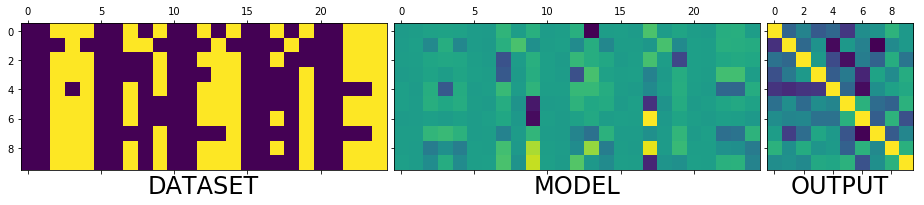

correct: 10/10, loss:0.00027968379436060786
epoch: 43000, loss:2.744394249020843e-06


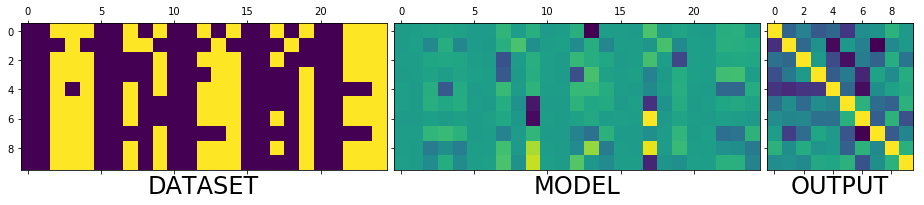

correct: 10/10, loss:0.0002743378863669932
epoch: 44000, loss:2.6928670158667955e-06


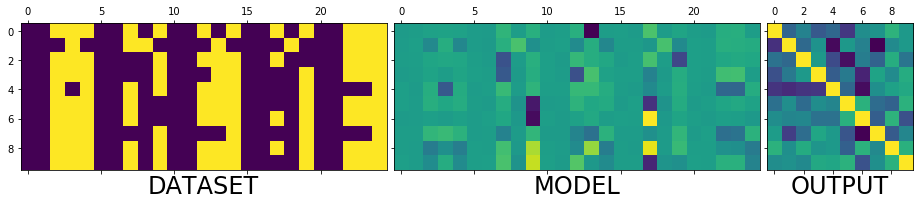

correct: 10/10, loss:0.0002691886038519442
epoch: 45000, loss:2.6431842416059228e-06


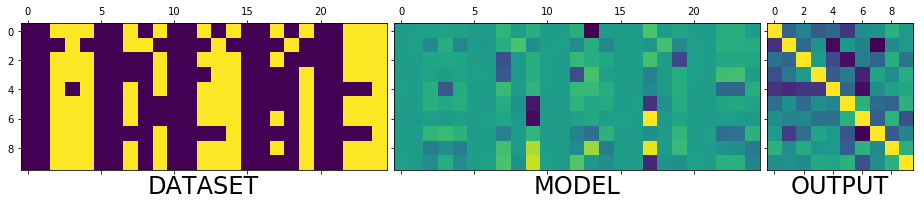

correct: 10/10, loss:0.00026422421797178686
epoch: 46000, loss:2.595654157630634e-06


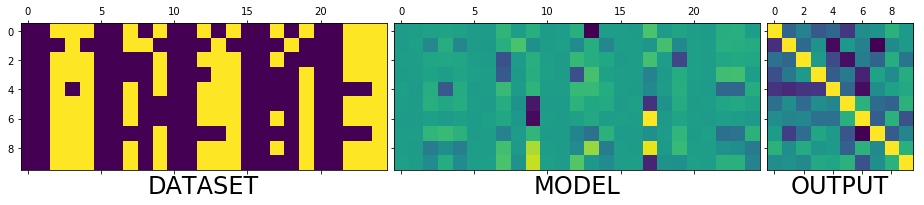

correct: 10/10, loss:0.00025947438552975655
epoch: 47000, loss:2.5499546827632003e-06


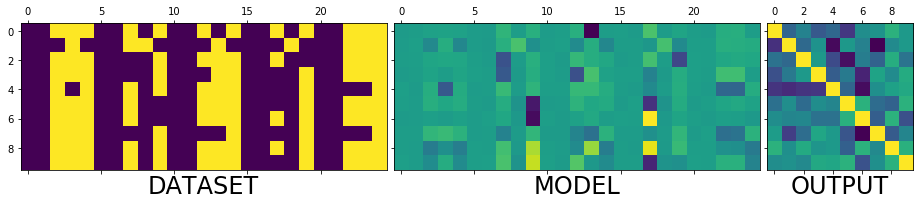

correct: 10/10, loss:0.0002549075579736382
epoch: 48000, loss:2.5057809216377793e-06


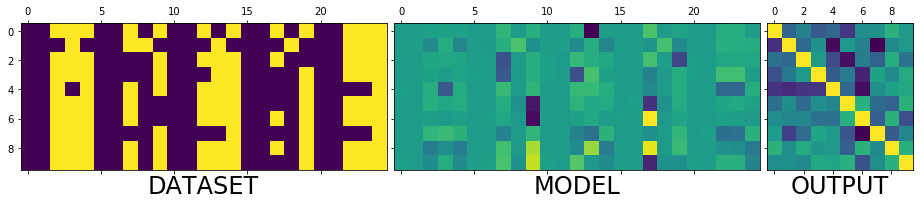

correct: 10/10, loss:0.00025049326359294355
epoch: 49000, loss:2.4633905304654037e-06


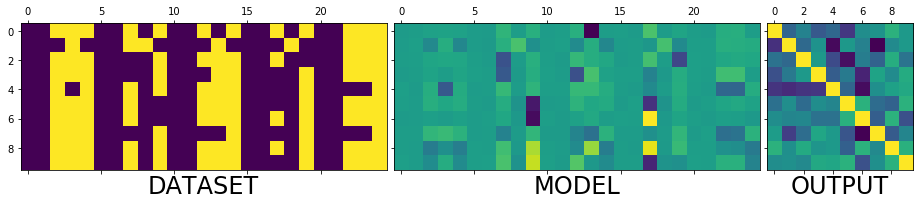

correct: 10/10, loss:0.0002462573756929487
epoch: 50000, loss:2.4225734814535825e-06


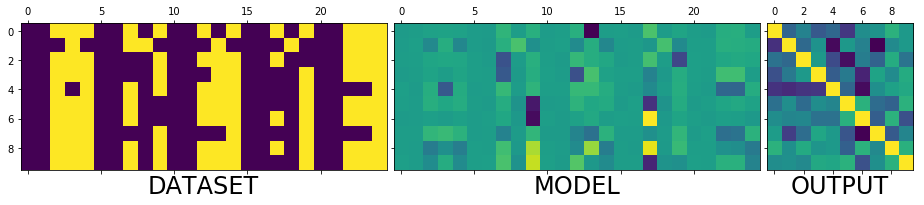

correct: 10/10, loss:0.00024217806640081108
epoch: 51000, loss:2.3830521495256107e-06


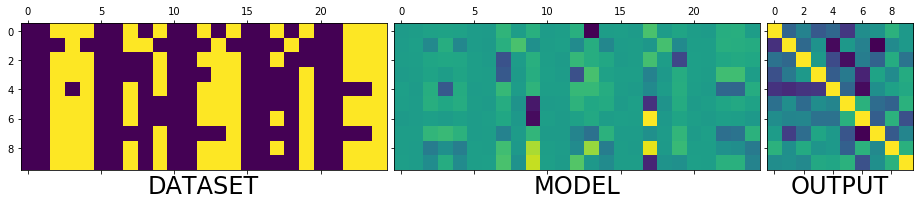

correct: 10/10, loss:0.0002382286766078323
epoch: 52000, loss:2.344911696127383e-06


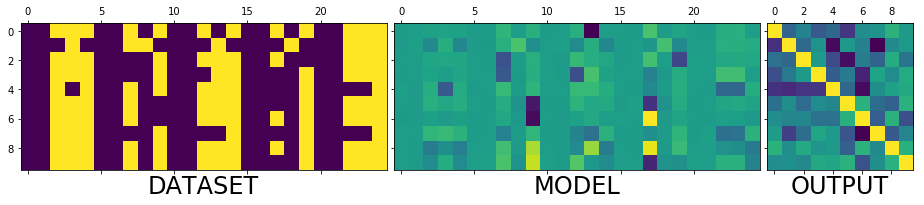

correct: 10/10, loss:0.0002344170061405748
epoch: 53000, loss:2.3082216066541153e-06


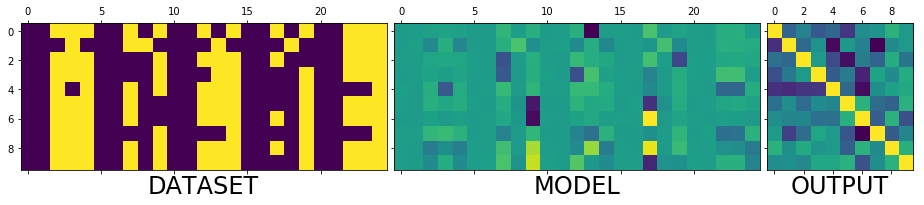

correct: 10/10, loss:0.00023075027274899185
epoch: 54000, loss:2.272542646096554e-06


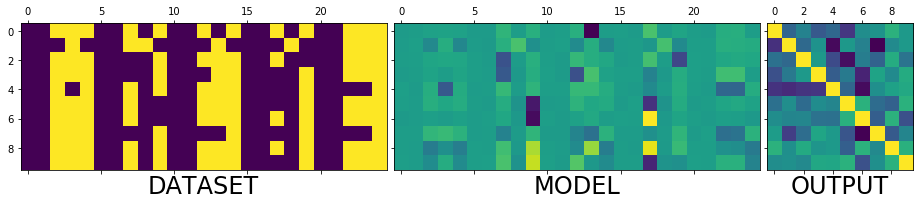

correct: 10/10, loss:0.00022718461696058512
epoch: 55000, loss:2.237642715044785e-06


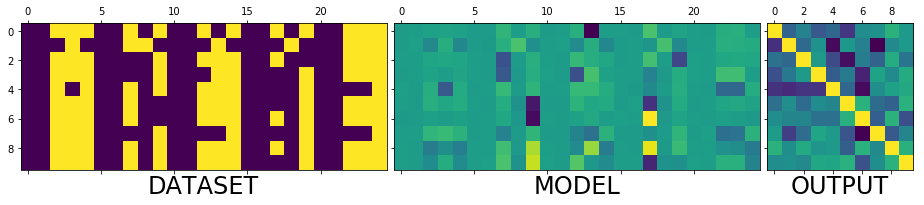

correct: 10/10, loss:0.00022369690123014152
epoch: 56000, loss:2.2039403484086506e-06


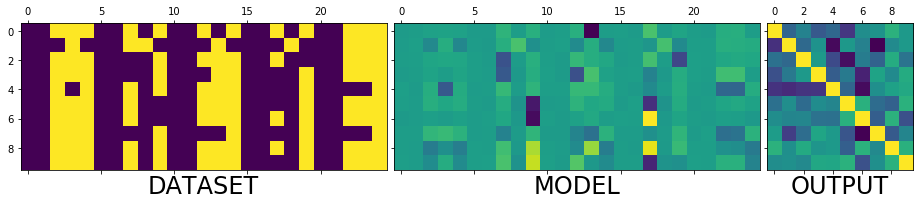

correct: 10/10, loss:0.000220328540308401
epoch: 57000, loss:2.171287556848256e-06


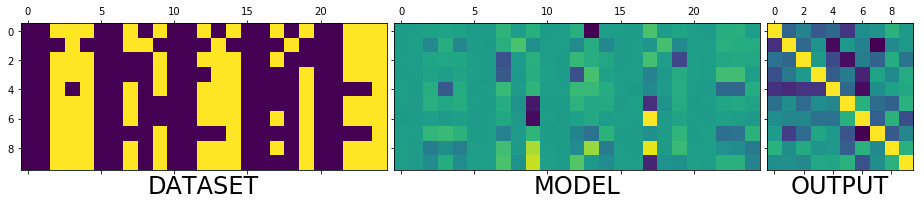

correct: 10/10, loss:0.00021706517145503312
epoch: 58000, loss:2.139623753464548e-06


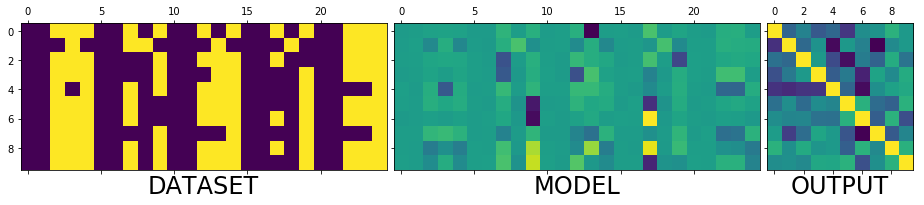

correct: 10/10, loss:0.0002139005810022354
epoch: 59000, loss:2.108841326844413e-06


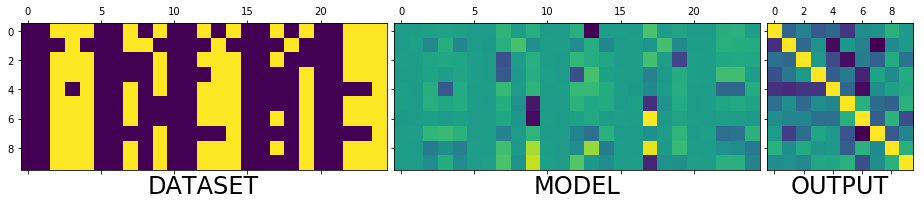

correct: 10/10, loss:0.00021082404418848455
epoch: 60000, loss:2.0792475115740673e-06


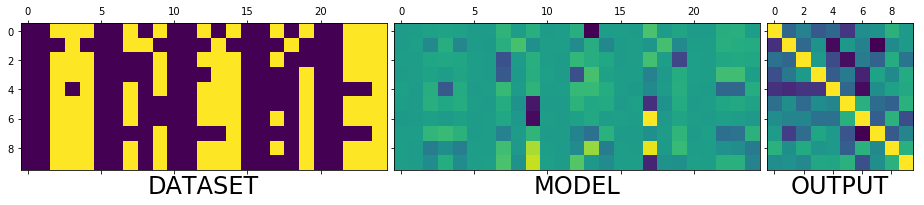

correct: 10/10, loss:0.0002078662655549124
epoch: 61000, loss:2.0501944491115864e-06


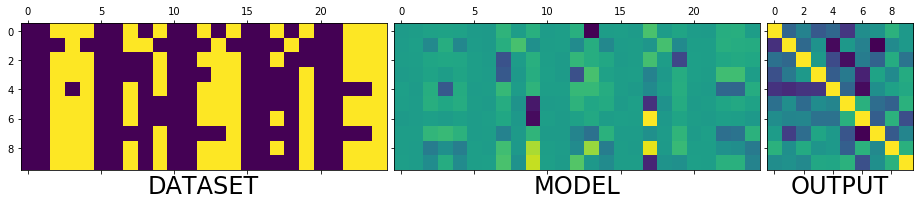

correct: 10/10, loss:0.00020496267825365067
epoch: 62000, loss:2.0219945909047967e-06


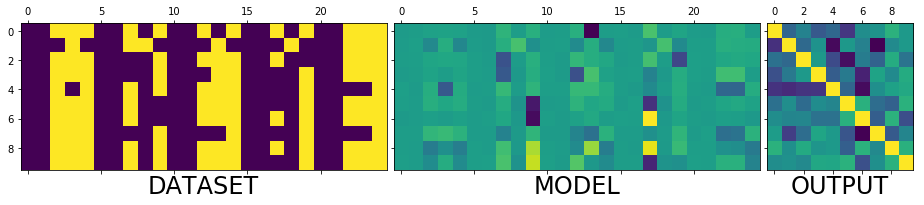

correct: 10/10, loss:0.0002021441760007292
epoch: 63000, loss:1.9942749677284153e-06


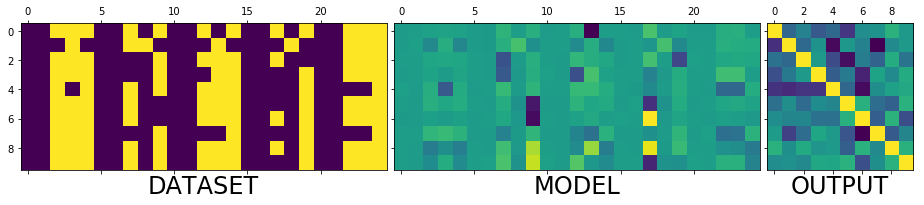

correct: 10/10, loss:0.0001993737678276375
epoch: 64000, loss:1.9675384701258736e-06


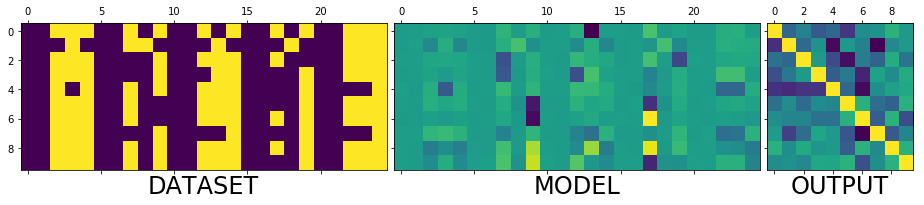

correct: 10/10, loss:0.00019670158508233726
epoch: 65000, loss:1.9416159211687046e-06


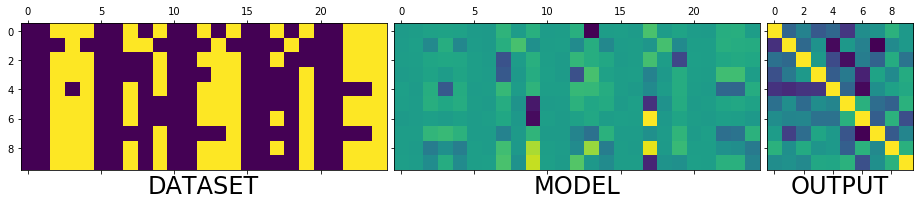

correct: 10/10, loss:0.0001941107475431636
epoch: 66000, loss:1.9162728531227913e-06


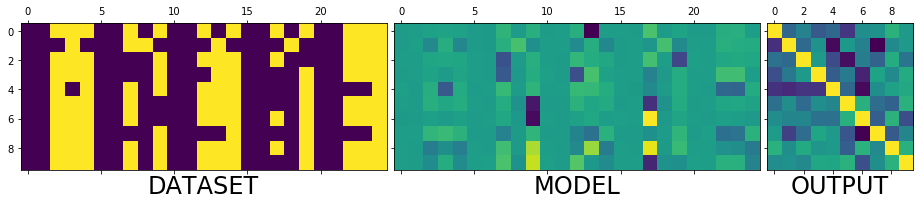

correct: 10/10, loss:0.00019157768110744655
epoch: 67000, loss:1.8914568463515025e-06


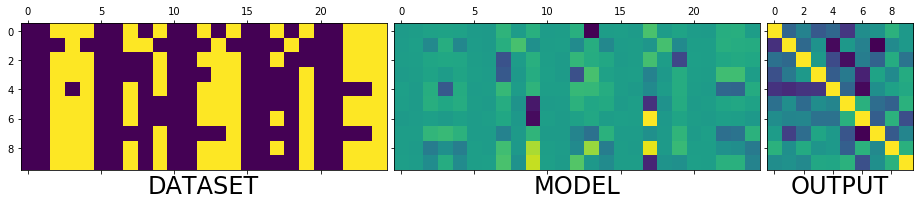

correct: 10/10, loss:0.00018909727805294096
epoch: 68000, loss:1.8671469733817505e-06


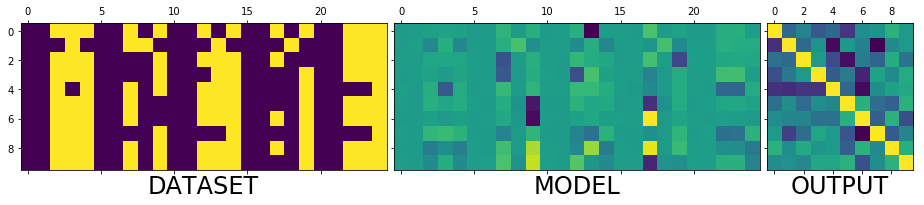

correct: 10/10, loss:0.00018666766118258238
epoch: 69000, loss:1.8432843062328176e-06


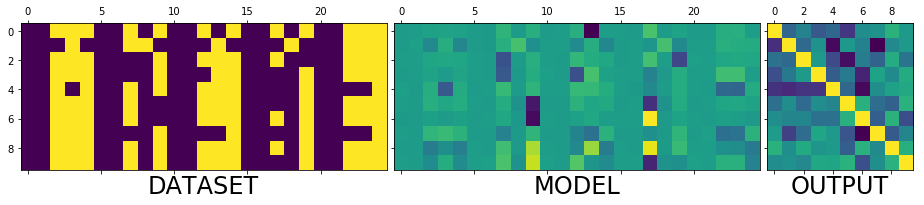

correct: 10/10, loss:0.00018428244220558554
epoch: 70000, loss:1.8202659266535192e-06


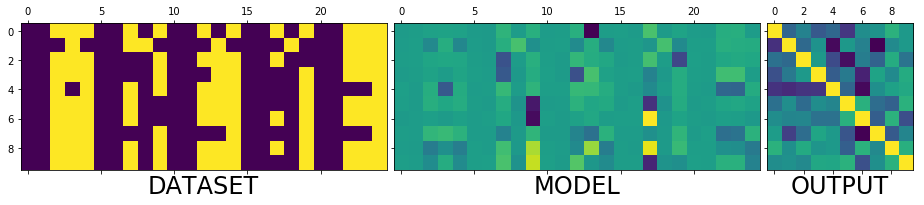

correct: 10/10, loss:0.00018198174075223505
epoch: 71000, loss:1.7980593765969386e-06


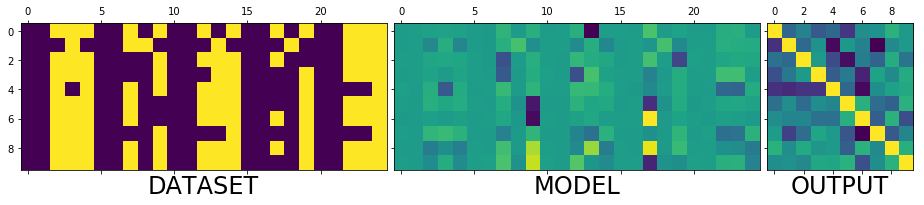

correct: 10/10, loss:0.00017976219533011317
epoch: 72000, loss:1.776098020854988e-06


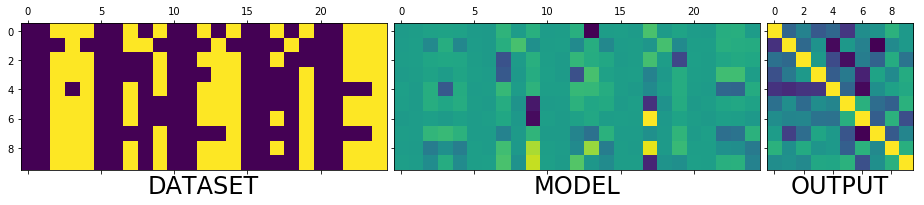

correct: 10/10, loss:0.00017756715533323586
epoch: 73000, loss:1.7548067298776003e-06


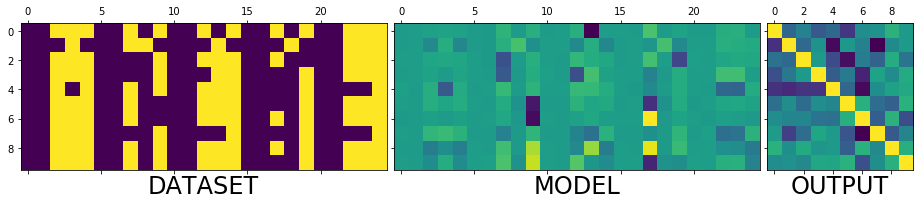

correct: 10/10, loss:0.00017543925787322223
epoch: 74000, loss:1.7340696340397697e-06


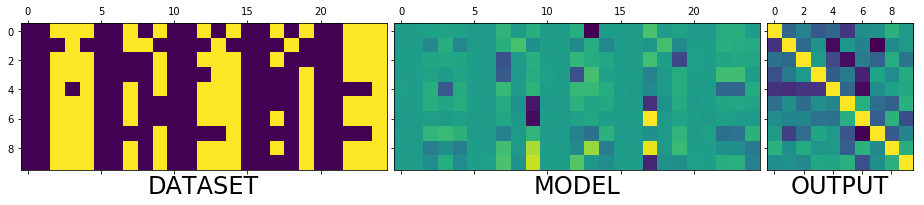

correct: 10/10, loss:0.00017336638120468706
epoch: 75000, loss:1.7136688547907397e-06


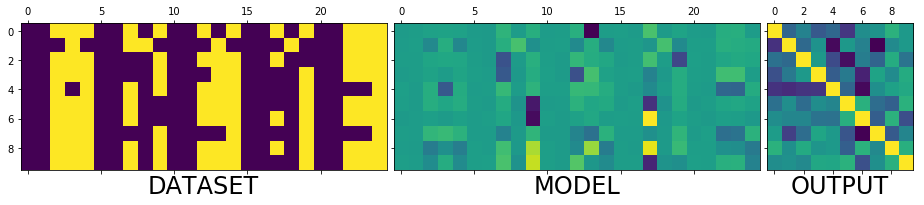

correct: 10/10, loss:0.00017132725042756647
epoch: 76000, loss:1.6937134751060513e-06


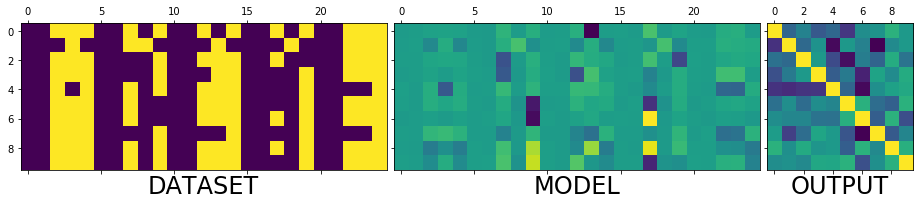

correct: 10/10, loss:0.00016933264851104468
epoch: 77000, loss:1.674388626270229e-06


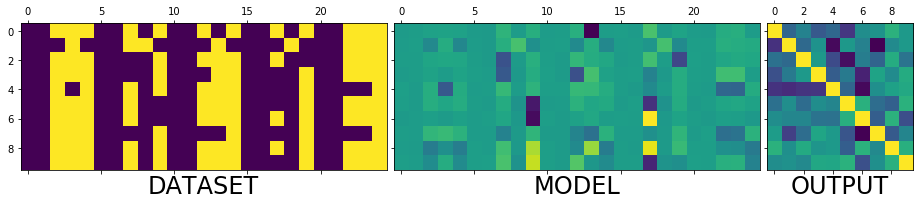

correct: 10/10, loss:0.00016740091086830944
epoch: 78000, loss:1.6554753019590862e-06


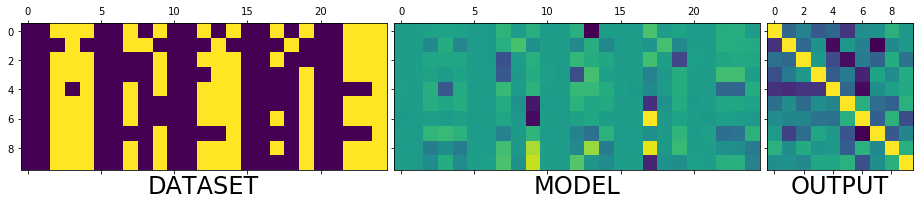

correct: 10/10, loss:0.00016551054432056844
epoch: 79000, loss:1.637008828765829e-06


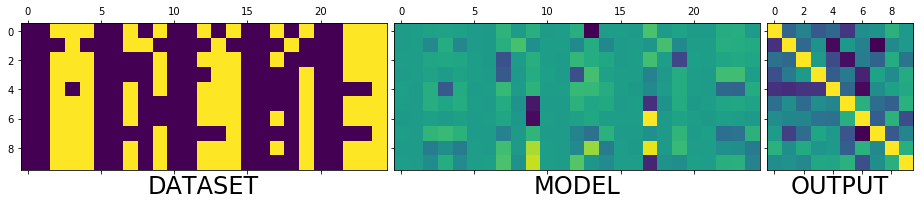

correct: 10/10, loss:0.0001636647357372567
epoch: 80000, loss:1.6191334980248941e-06


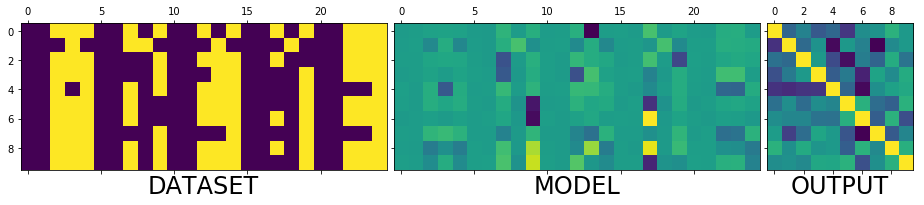

correct: 10/10, loss:0.00016187792061828077
epoch: 81000, loss:1.6014868397178361e-06


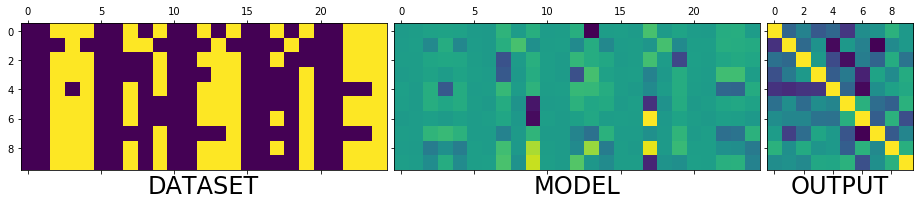

correct: 10/10, loss:0.00016011403931770474
epoch: 82000, loss:1.584194154929719e-06


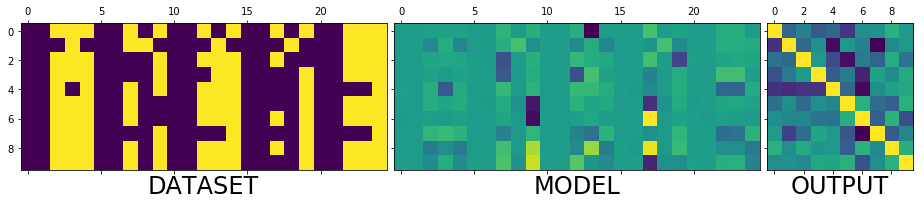

correct: 10/10, loss:0.00015838549006730318
epoch: 83000, loss:1.5670943212171552e-06


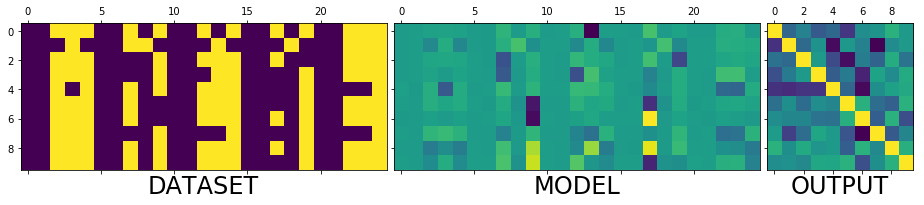

correct: 10/10, loss:0.00015667623665649444
epoch: 84000, loss:1.5502425030717862e-06


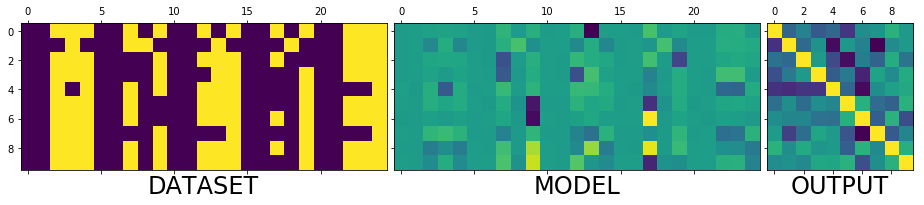

correct: 10/10, loss:0.0001549917069496587
epoch: 85000, loss:1.5339244127972053e-06


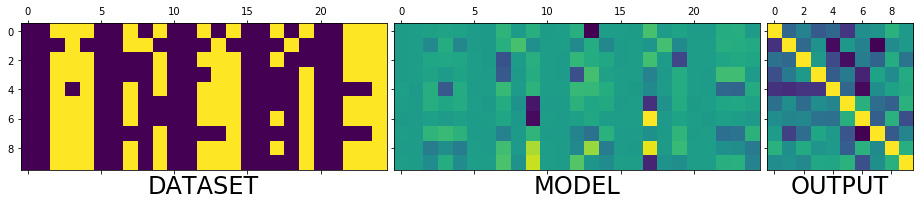

correct: 10/10, loss:0.00015336077194660902
epoch: 86000, loss:1.5179560068645515e-06


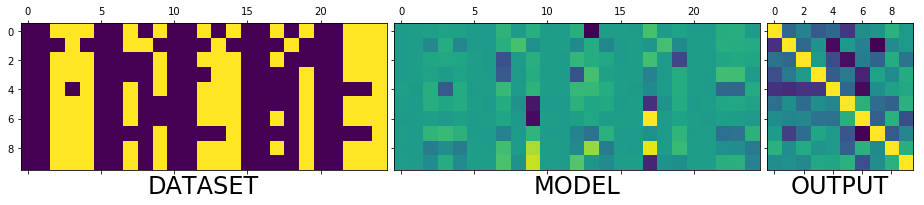

correct: 10/10, loss:0.0001517643395345658
epoch: 87000, loss:1.5023343512439169e-06


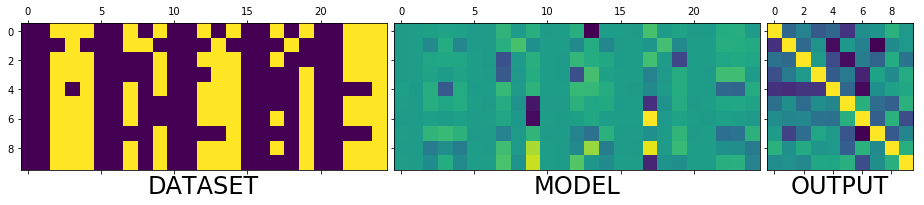

correct: 10/10, loss:0.00015020293358247727
epoch: 88000, loss:1.4870688719383907e-06


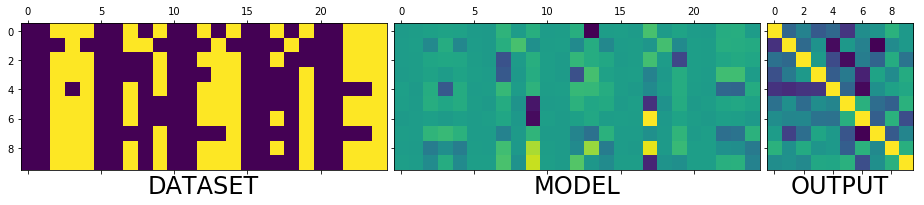

correct: 10/10, loss:0.00014867704885546118
epoch: 89000, loss:1.4721054612891748e-06


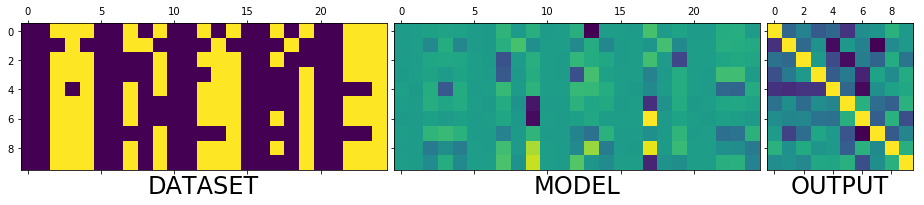

correct: 10/10, loss:0.00014718130114488304
epoch: 90000, loss:1.4575626482837834e-06


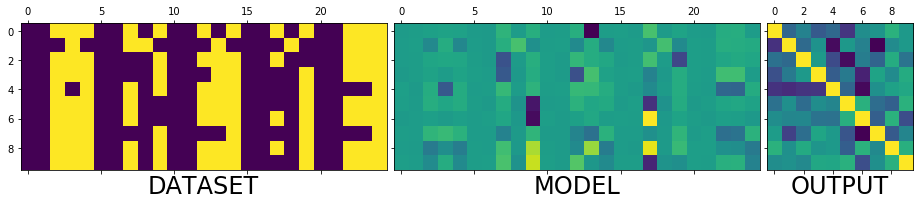

correct: 10/10, loss:0.00014572765212506056
epoch: 91000, loss:1.44314118733746e-06


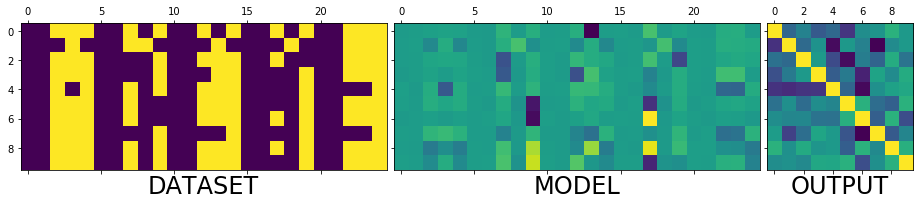

correct: 10/10, loss:0.00014428579015657306
epoch: 92000, loss:1.4288767615653342e-06


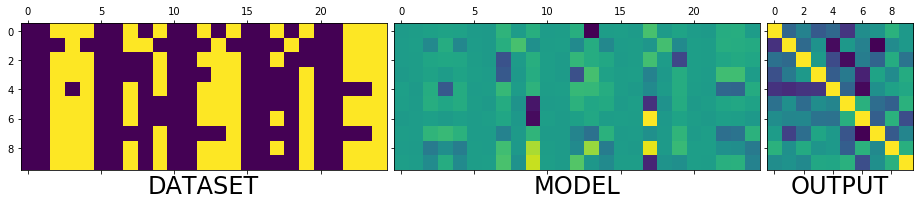

correct: 10/10, loss:0.00014286009536590427
epoch: 93000, loss:1.4148931950330734e-06


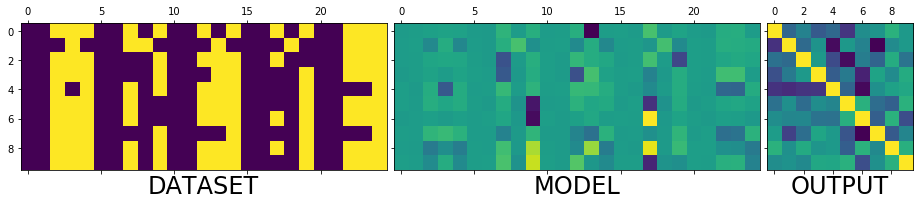

correct: 10/10, loss:0.0001414622092852369
epoch: 94000, loss:1.4011994953762042e-06


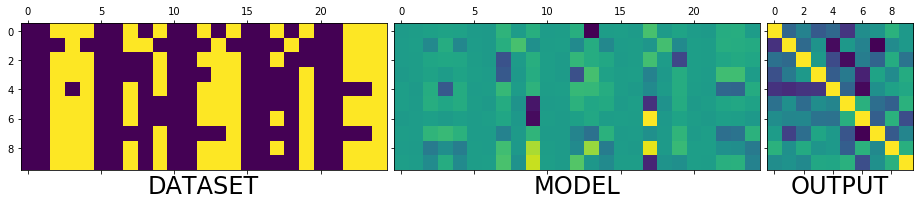

correct: 10/10, loss:0.00014009341248311102
epoch: 95000, loss:1.3878234531148337e-06


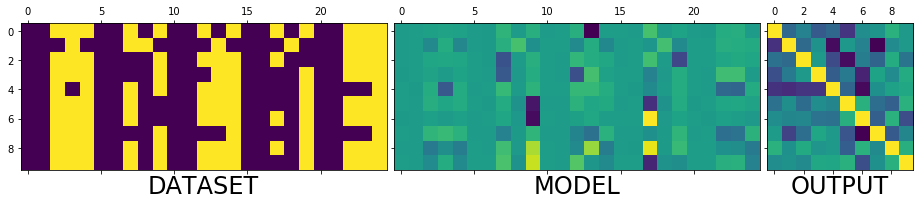

correct: 10/10, loss:0.00013875641161575913
epoch: 96000, loss:1.3746419735980453e-06


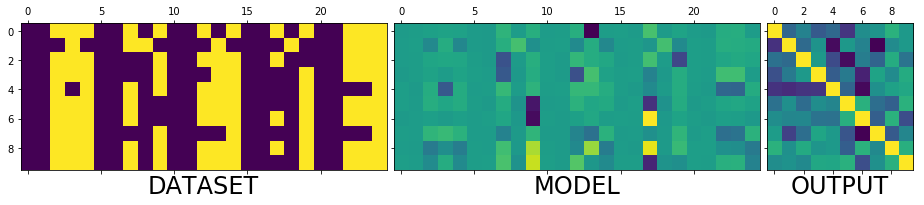

correct: 10/10, loss:0.0001374386774841696
epoch: 97000, loss:1.361803597319522e-06


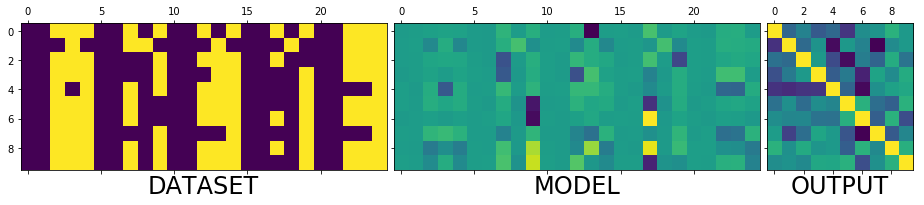

correct: 10/10, loss:0.00013615534408017993
epoch: 98000, loss:1.3493407550413395e-06


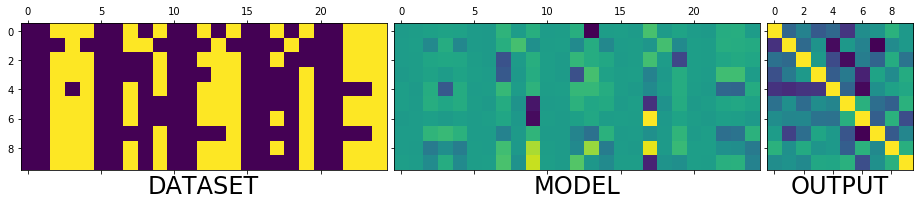

correct: 10/10, loss:0.00013490939454641193
epoch: 99000, loss:1.337103256446426e-06


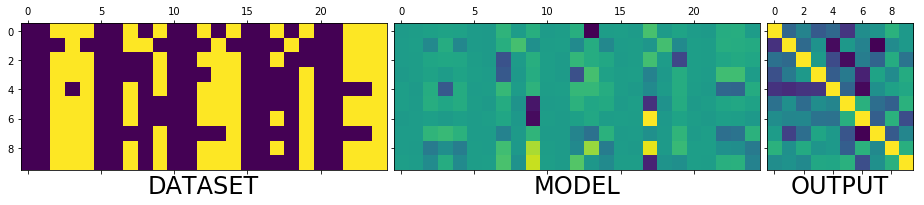

correct: 10/10, loss:0.0001336860441369936


In [40]:
snaps = train_epochs(10000, model, optimizer, dataset, print_every=1000)

In [37]:
torch.save(model.state_dict(), 'model_150000.pth')

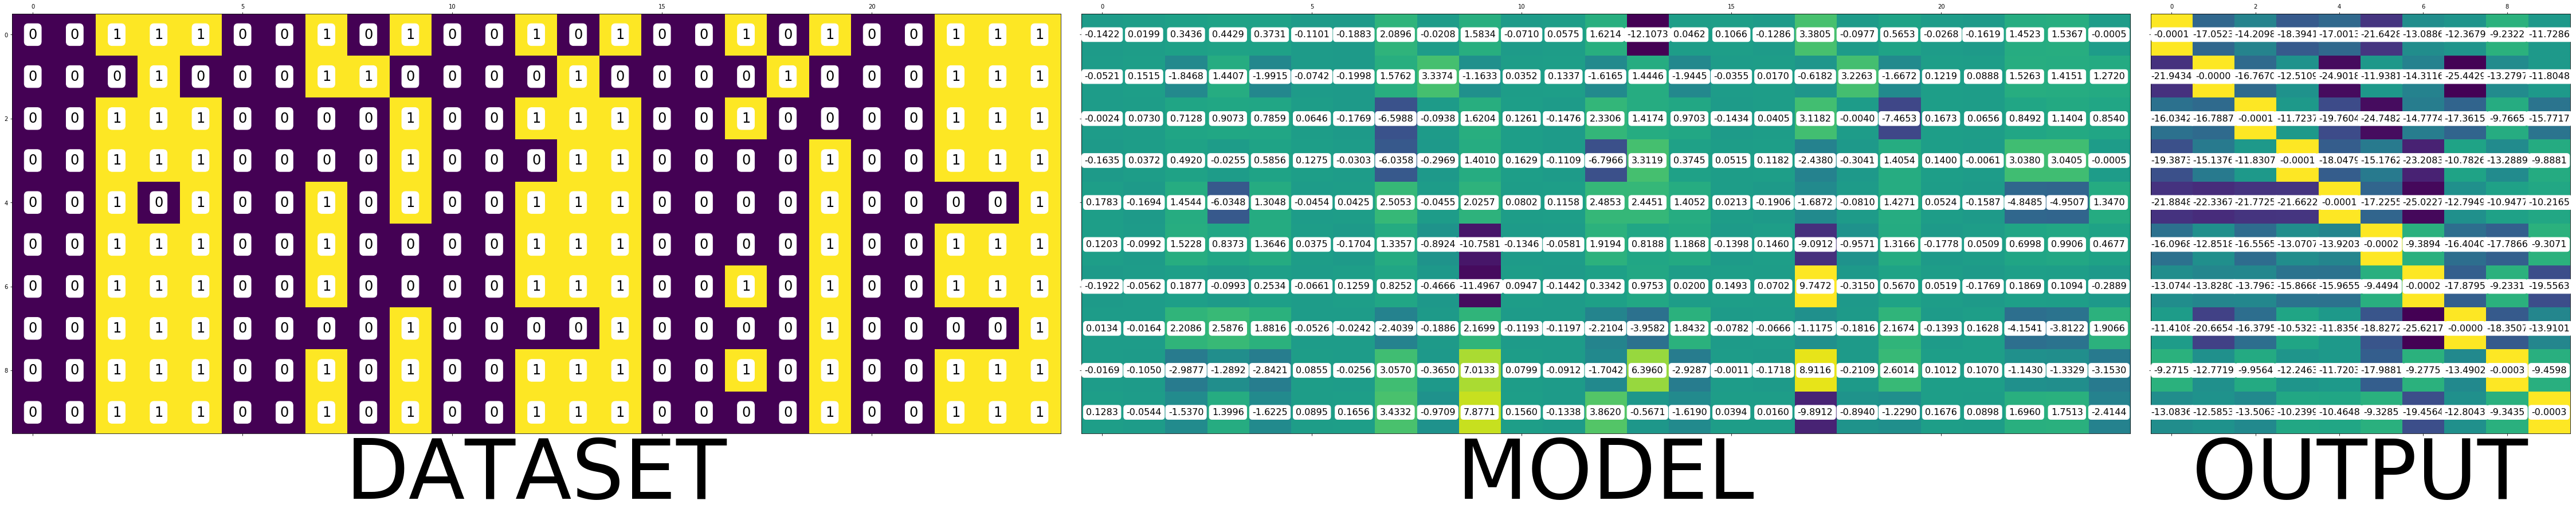

In [41]:
plot_with_values(model, dataset)

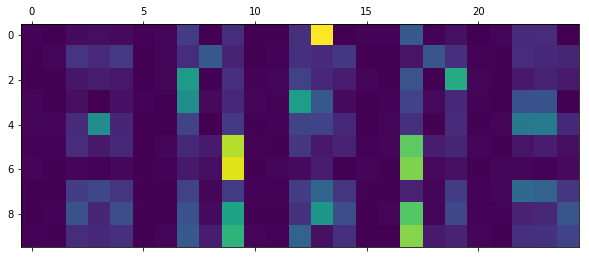

In [47]:
normalized_model = model.output_layer.weight.data.numpy()
normalized_model = numpy.absolute(normalized_model)
total  =  normalized_model.sum()
normalized_model = normalized_model/total

plt.matshow(normalized_model)